In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/Users/vaish2205/Desktop/Dissertation/BasicCompanyDataAsOneFile-2025-06-01.csv')

# Function to explore the dataset
def explore_dataset(df):
    print("📊 Basic Dataset Information\n" + "-"*40)
    
    print(f"Shape of dataset: {df.shape[0]} rows, {df.shape[1]} columns\n")
    
    print("🧾 Column Names:")
    print(df.columns.tolist(), "\n")
    
    print("🧬 Data Types:")
    print(df.dtypes, "\n")
    
    print("🔍 First 5 Rows:")
    print(df.head(), "\n")
    
    print("🔚 Last 5 Rows:")
    print(df.tail(), "\n")
    
    print("📉 Summary Statistics:")
    print(df.describe(include='all'), "\n")
    
    print("❓ Missing Values:")
    print(df.isnull().sum(), "\n")
    
    print("🧩 Duplicate Rows Count:")
    print(df.duplicated().sum(), "\n")
    
    print("🧠 Dataset Info:")
    df.info()

# Call the function to explore your loaded dataset
explore_dataset(df)


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/1991565222.py:4: DtypeWarning: Columns (3,41,42,43,44,45,46,47,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/vaish2205/Desktop/Dissertation/BasicCompanyDataAsOneFile-2025-06-01.csv')


📊 Basic Dataset Information
----------------------------------------
Shape of dataset: 5656584 rows, 55 columns

🧾 Column Names:
['CompanyName', ' CompanyNumber', 'RegAddress.CareOf', 'RegAddress.POBox', 'RegAddress.AddressLine1', ' RegAddress.AddressLine2', 'RegAddress.PostTown', 'RegAddress.County', 'RegAddress.Country', 'RegAddress.PostCode', 'CompanyCategory', 'CompanyStatus', 'CountryOfOrigin', 'DissolutionDate', 'IncorporationDate', 'Accounts.AccountRefDay', 'Accounts.AccountRefMonth', 'Accounts.NextDueDate', 'Accounts.LastMadeUpDate', 'Accounts.AccountCategory', 'Returns.NextDueDate', 'Returns.LastMadeUpDate', 'Mortgages.NumMortCharges', 'Mortgages.NumMortOutstanding', 'Mortgages.NumMortPartSatisfied', 'Mortgages.NumMortSatisfied', 'SICCode.SicText_1', 'SICCode.SicText_2', 'SICCode.SicText_3', 'SICCode.SicText_4', 'LimitedPartnerships.NumGenPartners', 'LimitedPartnerships.NumLimPartners', 'URI', 'PreviousName_1.CONDATE', ' PreviousName_1.CompanyName', ' PreviousName_2.CONDATE', 

In [3]:
# Calculate percentage of missing values per column
missing_percent = df.isnull().mean() * 100

# Sort descending and print
missing_percent = missing_percent.sort_values(ascending=False)

print(missing_percent)


DissolutionDate                       100.000000
 PreviousName_10.CompanyName           99.999328
PreviousName_10.CONDATE                99.999328
 PreviousName_9.CompanyName            99.998922
PreviousName_9.CONDATE                 99.998922
 PreviousName_8.CompanyName            99.998197
PreviousName_8.CONDATE                 99.998197
PreviousName_7.CONDATE                 99.996676
 PreviousName_7.CompanyName            99.996676
PreviousName_6.CONDATE                 99.991921
 PreviousName_6.CompanyName            99.991921
 PreviousName_5.CompanyName            99.976187
PreviousName_5.CONDATE                 99.976187
PreviousName_4.CONDATE                 99.918131
 PreviousName_4.CompanyName            99.918131
PreviousName_3.CONDATE                 99.666389
 PreviousName_3.CompanyName            99.666389
RegAddress.CareOf                      99.463422
RegAddress.POBox                       99.380103
 PreviousName_2.CompanyName            98.411586
 PreviousName_2.COND

In [5]:
import pandas as pd

# Step 1: Clean column names
df.columns = df.columns.str.strip()

# Step 2: Drop columns with >80% missing values
threshold = 0.8
missing_fraction = df.isnull().mean()
cols_to_drop = missing_fraction[missing_fraction > threshold].index
df_clean = df.drop(columns=cols_to_drop)
print(f"🗑️ Dropped columns with >{threshold*100}% missing values:\n", list(cols_to_drop))

# Step 3: Drop known unnecessary columns (if still present)
if 'Returns.LastMadeUpDate' in df_clean.columns:
    df_clean.drop(columns=['Returns.LastMadeUpDate'], inplace=True)
    print("🗑️ Dropped 'Returns.LastMadeUpDate' due to >80% missing values.")

# Step 4: Fill address-related missing values with 'Unknown'
address_cols = [
    'RegAddress.AddressLine2',
    'RegAddress.County',
    'RegAddress.Country',
    'RegAddress.AddressLine1',
    'RegAddress.PostTown',
    'RegAddress.PostCode'
]
for col in address_cols:
    if col in df_clean.columns:
        df_clean[col].fillna('Unknown', inplace=True)

# Step 5: Convert date columns to datetime
date_cols = [
    'Returns.NextDueDate',
    'IncorporationDate',
    'Accounts.LastMadeUpDate',
    'ConfStmtLastMadeUpDate',
    'Accounts.NextDueDate',
    'ConfStmtNextDueDate'
]
for col in date_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

# Step 6: Fill mode for categorical numeric fields
for col in ['Accounts.AccountRefDay', 'Accounts.AccountRefMonth']:
    if col in df_clean.columns:
        mode_val = df_clean[col].mode(dropna=True)
        if not mode_val.empty:
            df_clean[col].fillna(mode_val[0], inplace=True)

# Step 7: Fill numeric missing values with median
numeric_cols = df_clean.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)

# Step 8: Fill remaining specific date columns with median date
for col in ['ConfStmtLastMadeUpDate']:
    if col in df_clean.columns:
        median_date = df_clean[col].median()
        df_clean[col].fillna(median_date, inplace=True)

# Step 9: Drop rows with missing values in key business columns
cols_to_check = [
    'Returns.NextDueDate',
    'IncorporationDate',
    'RegAddress.AddressLine2',
    'Accounts.LastMadeUpDate',
    'ConfStmtLastMadeUpDate',
    'Accounts.NextDueDate',
    'ConfStmtNextDueDate'
]
cols_to_check = [col for col in cols_to_check if col in df_clean.columns]
df_clean.dropna(subset=cols_to_check, inplace=True)
print(f"🧹 Dropped rows with missing values in critical columns: {cols_to_check}")


🗑️ Dropped columns with >80.0% missing values:
 ['RegAddress.CareOf', 'RegAddress.POBox', 'DissolutionDate', 'SICCode.SicText_2', 'SICCode.SicText_3', 'SICCode.SicText_4', 'PreviousName_1.CONDATE', 'PreviousName_1.CompanyName', 'PreviousName_2.CONDATE', 'PreviousName_2.CompanyName', 'PreviousName_3.CONDATE', 'PreviousName_3.CompanyName', 'PreviousName_4.CONDATE', 'PreviousName_4.CompanyName', 'PreviousName_5.CONDATE', 'PreviousName_5.CompanyName', 'PreviousName_6.CONDATE', 'PreviousName_6.CompanyName', 'PreviousName_7.CONDATE', 'PreviousName_7.CompanyName', 'PreviousName_8.CONDATE', 'PreviousName_8.CompanyName', 'PreviousName_9.CONDATE', 'PreviousName_9.CompanyName', 'PreviousName_10.CONDATE', 'PreviousName_10.CompanyName']
🗑️ Dropped 'Returns.LastMadeUpDate' due to >80% missing values.


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/957987104.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna('Unknown', inplace=True)
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/957987104.py:42: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipy

🧹 Dropped rows with missing values in critical columns: ['Returns.NextDueDate', 'IncorporationDate', 'RegAddress.AddressLine2', 'Accounts.LastMadeUpDate', 'ConfStmtLastMadeUpDate', 'Accounts.NextDueDate', 'ConfStmtNextDueDate']


In [7]:
# Check if any missing values exist
any_missing = df_clean.isnull().values.any()
print("Are there any missing values left?", any_missing)

# Show detailed missing values per column (only if any exist)
if any_missing:
    missing_percent = df_clean.isnull().mean() * 100
    print("\nMissing values percentage per column:")
    print(missing_percent[missing_percent > 0].sort_values(ascending=False))
else:
    print("✅ All missing values have been handled.")

# Save the cleaned DataFrame to a CSV file
df_clean.to_csv("Cleaned House data.csv", index=False)
print("Cleaned data saved as 'Cleaned House data.csv'")



Are there any missing values left? False
✅ All missing values have been handled.
Cleaned data saved as 'Cleaned House data.csv'


In [9]:
import pandas as pd

# Load the cleaned house data
df = pd.read_csv("Cleaned House data.csv")

# Show dataset shape (rows, columns)
print(f"Dataset shape: {df.shape}\n")

# Show info about columns and data types
print("Data types and non-null counts:")
print(df.info(), "\n")

# Calculate missing values count and percentage per column
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

print("Missing values per column (if any):")
print(missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing %', ascending=False), "\n")

# Show basic statistics summary for numeric columns
print("Basic statistics summary:")
print(df.describe(), "\n")

# Preview first 5 rows of data
print("First 5 rows of the dataset:")
print(df.head())


Dataset shape: (1265591, 28)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265591 entries, 0 to 1265590
Data columns (total 28 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   CompanyName                         1265591 non-null  object 
 1   CompanyNumber                       1265591 non-null  object 
 2   RegAddress.AddressLine1             1265591 non-null  object 
 3   RegAddress.AddressLine2             1265591 non-null  object 
 4   RegAddress.PostTown                 1265591 non-null  object 
 5   RegAddress.County                   1265591 non-null  object 
 6   RegAddress.Country                  1265591 non-null  object 
 7   RegAddress.PostCode                 1265591 non-null  object 
 8   CompanyCategory                     1265591 non-null  object 
 9   CompanyStatus                       1265591 non-null  object 
 10  CountryOfOrigin 

In [11]:
import pandas as pd

# Load the cleaned house dataset
house_df = pd.read_csv("Cleaned House data.csv")

# Check for missing values
missing_values = house_df.isnull().sum()

# Display only columns with missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns.sort_values(ascending=False))


Columns with missing values:
Series([], dtype: int64)


In [13]:
import pandas as pd
import json
import os

# Define base path where your JSON files are stored
base_path = '/Users/vaish2205/Downloads/'  # Update this path if needed

table_files = {
    'charity': 'publicextract.charity.json',
    'ar_parta': 'publicextract.charity_annual_return_parta.json',
    'ar_partb': 'publicextract.charity_annual_return_partb.json',
    'annual_return': 'publicextract.charity_annual_return_history.json',
    'classification': 'publicextract.charity_classification.json',
    'policy': 'publicextract.charity_policy.json',
    'trustee': 'publicextract.charity_trustee.json',
    'area': 'publicextract.charity_area_of_operation.json',
    
    # Optional:
    'event_history': 'publicextract.charity_event_history.json',
    'governing_document': 'publicextract.charity_governing_document.json',
    'other_names': 'publicextract.charity_other_names.json',
    'other_regulators': 'publicextract.charity_other_regulators.json',
    'published_report': 'publicextract.charity_published_report.json',
}


# Function to load JSON file into a DataFrame
def load_json_df(filepath):
    with open(filepath, 'r', encoding='utf-8-sig') as f:
        data = json.load(f)
    return pd.DataFrame(data)

# Load all data into a dictionary of DataFrames
datasets = {}
for key, filename in table_files.items():
    full_path = os.path.join(base_path, filename)
    print(f"Loading {filename}...")
    datasets[key] = load_json_df(full_path)

# Example: access the charity DataFrame
charity = datasets['charity']
ar_parta = datasets['ar_parta']
ar_partb = datasets['ar_partb']
annual_return = datasets['annual_return']
classification = datasets['classification']
policy = datasets['policy']
trustee = datasets['trustee']
area = datasets['area']

# Optional tables (included in your directory)
event_history = datasets['event_history']
governing_document = datasets['governing_document']
other_names = datasets['other_names']
other_regulators = datasets['other_regulators']
published_report = datasets['published_report']


Loading publicextract.charity.json...
Loading publicextract.charity_annual_return_parta.json...
Loading publicextract.charity_annual_return_partb.json...
Loading publicextract.charity_annual_return_history.json...
Loading publicextract.charity_classification.json...
Loading publicextract.charity_policy.json...
Loading publicextract.charity_trustee.json...
Loading publicextract.charity_area_of_operation.json...
Loading publicextract.charity_event_history.json...
Loading publicextract.charity_governing_document.json...
Loading publicextract.charity_other_names.json...
Loading publicextract.charity_other_regulators.json...
Loading publicextract.charity_published_report.json...


In [15]:
# Start with charity as the base
merged = charity.copy()

# ---- Financial Features ----
# Merge part A financials (gov grants, contracts, etc.)
merged = merged.merge(ar_parta, on='organisation_number', how='left')

# Merge part B financials (reserves, assets, liabilities, etc.)
merged = merged.merge(ar_partb, on='organisation_number', how='left')

# ---- Annual Returns (Optional): Keep only most recent or aggregate stats later ----
# merged = merged.merge(annual_return, on='organisation_number', how='left')

# ---- Governance ----
# Count of governance policies
policy_count = policy.groupby('organisation_number').size().reset_index(name='policy_count')
merged = merged.merge(policy_count, on='organisation_number', how='left')

# Trustee count
trustee_count = trustee.groupby('organisation_number').size().reset_index(name='trustee_count')
merged = merged.merge(trustee_count, on='organisation_number', how='left')

# ---- Classification ----
classification_count = classification.groupby('organisation_number').size().reset_index(name='classification_count')
merged = merged.merge(classification_count, on='organisation_number', how='left')

# ---- Area of Operation ----
area_count = area.groupby('organisation_number').size().reset_index(name='area_coverage_count')
merged = merged.merge(area_count, on='organisation_number', how='left')


In [17]:
import pandas as pd

# Convert to datetime
merged['date_of_registration'] = pd.to_datetime(merged['date_of_registration'], errors='coerce')
merged['date_of_removal'] = pd.to_datetime(merged['date_of_removal'], errors='coerce')

# Define target: survival status
merged['is_surviving'] = merged['date_of_removal'].isnull().astype(int)

# Define end date (removal date or today)
merged['end_date'] = merged['date_of_removal'].fillna(pd.Timestamp.today())

# Duration in days
merged['survival_days'] = (merged['end_date'] - merged['date_of_registration']).dt.days

# Right-censoring flag
merged['censored'] = merged['date_of_removal'].isnull().astype(int)


In [19]:
import numpy as np  # Ensure this is imported


print(" Merged Dataset Overview")
print(f" Rows: {merged.shape[0]}, Columns: {merged.shape[1]}")
print()


print(" Column Data Types:")
print(merged.dtypes)
print()

print(" Missing Values (All Columns with Missing Data):")
missing = merged.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)
print()


duplicates = merged.duplicated().sum()
print(f" Duplicate Rows: {duplicates}")
print()

#  Sample rows
print(" First 5 Sample Rows:")
display(merged.head(5))


print(" Summary Statistics (Numerical Columns):")
display(merged.describe(include=[np.number]))


print(" Summary Statistics (Categorical Columns):")
display(merged.describe(include=['object']))


 Merged Dataset Overview
 Rows: 1121334, Columns: 140

 Column Data Types:
date_of_extract_x                      object
organisation_number                     int64
registered_charity_number_x             int64
linked_charity_number                   int64
charity_name                           object
                                    ...      
area_coverage_count                   float64
is_surviving                            int64
end_date                       datetime64[ns]
survival_days                           int64
censored                                int64
Length: 140, dtype: object

 Missing Values (All Columns with Missing Data):


charity_is_cdf_or_cif              1121222
date_cio_dissolution_notice        1120675
count_salary_band_450001_500000    1106887
count_salary_band_over_500000      1106859
count_salary_band_400001_450000    1106765
                                    ...   
area_coverage_count                 120667
cio_is_dissolved                     40208
charity_is_cio                       40208
charity_previously_excepted          40208
charity_reporting_status             40208
Length: 127, dtype: int64


 Duplicate Rows: 0

 First 5 Sample Rows:


,date_of_extract_x,organisation_number,registered_charity_number_x,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,charity_only_accounts,consolidated_accounts,policy_count,trustee_count,classification_count,area_coverage_count,is_surviving,end_date,survival_days,censored
0,2025-06-14T00:00:00,1,200027,1,POTTERNE MISSION ROOM AND TRUST,None,Removed,1962-05-17,2014-04-16,None,...,NaN,NaN,NaN,NaN,NaN,NaN,0,2014-04-16 00:00:00.000000,18962,0
1,2025-06-14T00:00:00,2,200027,2,HITCHAM FREE CHURCH,None,Registered,1962-05-17,NaT,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2025-07-07 14:14:39.851751,23062,1
2,2025-06-14T00:00:00,3,200028,1,TOWN LANDS CHARITY FOR THE POOR,None,Removed,1961-10-19,1997-09-17,None,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1997-09-17 00:00:00.000000,13117,0
3,2025-06-14T00:00:00,4,200028,2,TOWN LANDS CHARITY FOR THE CHURCH,None,Removed,1961-10-19,1997-09-17,None,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1997-09-17 00:00:00.000000,13117,0
4,2025-06-14T00:00:00,5,200034,1,CLOPHILL RELIEF IN NEED CHARITY,None,Registered,1972-07-19,NaT,None,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2025-07-07 14:14:39.851751,19346,1


 Summary Statistics (Numerical Columns):


,organisation_number,registered_charity_number_x,linked_charity_number,latest_income,latest_expenditure,registered_charity_number_y,fin_period_order_number_x,total_gross_income,total_gross_expenditure,count_govt_contracts,...,funds_restricted,funds_total,count_employees,policy_count,trustee_count,classification_count,area_coverage_count,is_surviving,survival_days,censored
count,1.121334e+06,1.121334e+06,1.121334e+06,9.774360e+05,9.774360e+05,8.995810e+05,899581.000000,8.995810e+05,8.995810e+05,314238.000000,...,3.621150e+05,3.621150e+05,362125.000000,799991.000000,775103.000000,993084.000000,1.000667e+06,1.121334e+06,1.121334e+06,1.121334e+06
mean,2.703353e+06,8.629477e+05,5.089795e-01,2.536766e+06,2.561708e+06,9.188379e+05,2.919972,2.496166e+06,2.441804e+06,207.765442,...,1.956247e+06,1.766706e+07,84.154692,11.100634,6.755012,7.205451,2.626625e+00,7.047508e-01,9.249970e+03,7.047508e-01
std,2.068405e+06,3.752115e+05,6.223540e+00,1.958927e+07,2.136324e+07,3.487675e+05,1.412981,1.925491e+07,2.018976e+07,10930.878923,...,2.237963e+07,2.933743e+08,662.246473,5.738670,4.977302,3.994584,9.083729e+00,4.561549e-01,6.225908e+03,4.561549e-01
min,1.000000e+00,2.000000e+05,0.000000e+00,-7.334000e+04,0.000000e+00,2.000010e+05,1.000000,0.000000e+00,-5.421490e+05,0.000000,...,-5.497400e+07,-1.983171e+08,0.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.285710e+05,5.034280e+05,0.000000e+00,1.456700e+04,1.466975e+04,8.005230e+05,2.000000,2.261900e+04,2.043000e+04,0.000000,...,0.000000e+00,4.655770e+05,7.000000,6.000000,4.000000,4.000000,1.000000e+00,0.000000e+00,4.182250e+03,0.000000e+00
50%,3.954353e+06,1.074008e+06,0.000000e+00,9.577500e+04,9.725000e+04,1.095815e+06,3.000000,1.252030e+05,1.187390e+05,0.000000,...,5.670400e+04,1.451870e+06,22.000000,12.000000,6.000000,6.000000,1.000000e+00,1.000000e+00,7.872000e+03,1.000000e+00
75%,5.014263e+06,1.140913e+06,0.000000e+00,9.016692e+05,9.068120e+05,1.149169e+06,4.000000,9.474120e+05,9.087150e+05,1.000000,...,3.830000e+05,6.160506e+06,56.000000,16.000000,9.000000,9.000000,2.000000e+00,1.000000e+00,1.266900e+04,1.000000e+00
max,5.266690e+06,1.213631e+06,2.960000e+02,1.358100e+09,1.660835e+09,1.210106e+06,5.000000,1.488506e+09,1.660835e+09,987361.000000,...,1.848467e+09,3.626056e+10,146000.000000,23.000000,102.000000,34.000000,2.760000e+02,1.000000e+00,2.367700e+04,1.000000e+00


 Summary Statistics (Categorical Columns):


,date_of_extract_x,charity_name,charity_type,charity_registration_status,charity_reporting_status,latest_acc_fin_period_start_date,latest_acc_fin_period_end_date,charity_contact_address1,charity_contact_address2,charity_contact_address3,...,employees_salary_over_60k,date_of_extract,latest_fin_period_submitted_ind_y,ar_cycle_reference_y,fin_period_start_date_y,fin_period_end_date_y,ar_due_date_y,ar_received_date_y,charity_only_accounts,consolidated_accounts
count,1121334,1121334,964586,1121334,1081126,977436,977436,775638,773810,623314,...,663030,362129,362129,362129,362129,362129,362129,362129,275901,86135
unique,1,372895,5,2,7,4284,4090,136599,74368,31733,...,2,1,2,19,1050,684,665,4782,1,2
top,2025-06-14T00:00:00,VILLAGE HALL,Charitable company,Registered,Submission Received,2023-04-01T00:00:00,2024-03-31T00:00:00,Village Hall,LONDON,LONDON,...,False,2025-06-14T00:00:00,False,AR23,2023-04-01T00:00:00,2024-03-31T00:00:00,2025-01-31T00:00:00,2024-01-31T00:00:00,True,True
freq,1121334,459,352639,790261,680306,268097,269795,1068,37824,51363,...,522985,362129,283691,67136,30439,30601,30601,3560,275901,86095


In [21]:
# Total number of rows
total_rows = len(merged)

# Get missing values as percentage
missing_percent = merged.isnull().mean() * 100

# Filter only columns with at least one missing value
missing_percent = missing_percent[missing_percent > 0]

# Sort by highest percentage
missing_percent = missing_percent.sort_values(ascending=False)

# Display the result
print("📊 Missing Values Percentage by Column (Descending):")
for col, pct in missing_percent.items():
    print(f"{col:<40} : {pct:.2f}%")


📊 Missing Values Percentage by Column (Descending):
charity_is_cdf_or_cif                    : 99.99%
date_cio_dissolution_notice              : 99.94%
count_salary_band_450001_500000          : 98.71%
count_salary_band_over_500000            : 98.71%
count_salary_band_400001_450000          : 98.70%
count_salary_band_350001_400000          : 98.70%
count_salary_band_300001_350000          : 98.68%
count_salary_band_250001_300000          : 98.61%
charity_agreement_professional_fundraiser : 98.51%
count_salary_band_200001_250000          : 98.43%
count_salary_band_140001_150000          : 98.20%
count_salary_band_130001_140000          : 98.01%
count_salary_band_150001_200000          : 97.84%
count_salary_band_120001_130000          : 97.78%
count_salary_band_110001_120000          : 97.48%
count_salary_band_100001_110000          : 96.81%
count_salary_band_90001_100000           : 95.96%
count_salary_band_80001_90000            : 94.91%
charity_agreement_commerical_participator : 94.

In [23]:
import pandas as pd
import numpy as np

# -------------------------------
# 1. Drop Columns with >80% Missing Values
# -------------------------------
threshold = 0.80
high_missing_cols = merged.columns[merged.isnull().mean() > threshold]
merged.drop(columns=high_missing_cols, inplace=True)
print(f"\u274C Dropped {len(high_missing_cols)} columns with >80% missing values.")

# -------------------------------
# 2. Drop Fully Missing Columns
# -------------------------------
fully_missing_cols = merged.columns[merged.isnull().mean() == 1.0]
merged.drop(columns=fully_missing_cols, inplace=True)
print(f"🧹 Dropped {len(fully_missing_cols)} columns with 100% missing values.")

# -------------------------------
# 3. Drop Rows with Critical Missing Values
# -------------------------------
merged = merged[merged['organisation_number'].notnull()]
merged = merged[merged['date_of_registration'].notnull()]

# -------------------------------
# 4. Fill Financial Columns and Add Missing Flags
# -------------------------------
financial_cols = [
    'reserves',
    'total_gross_income',
    'total_gross_expenditure',
    'income_from_government_grants',
    'count_govt_contracts'
]

for col in financial_cols:
    if col in merged.columns:
        merged[f'missing_{col}'] = merged[col].isnull().astype(int)
        merged[col] = merged[col].fillna(0)
    else:
        print(f" Column '{col}' not found — skipped.")

# -------------------------------
# 5. Fill Operational & Governance Count Columns
# -------------------------------
for col in ['trustee_count', 'policy_count', 'classification_count', 'area_coverage_count']:
    if col in merged.columns:
        merged[col] = merged[col].fillna(0)

# -------------------------------
# 6. Fill Binary Indicators
# -------------------------------
binary_funding_cols = [
    'charity_receives_govt_funding_grants',
    'charity_receives_govt_funding_contracts',
    'charity_raises_funds_from_public',
    'charity_gift_aid',
    'charity_has_trading_subsidiary',
    'charity_has_land'
]

for col in binary_funding_cols:
    if col in merged.columns:
        merged[col] = merged[col].fillna(0).astype(int)

# -------------------------------
# 7. Fill Categorical Columns with 'Unknown'
# -------------------------------
cat_cols = [
    'charity_type', 'charity_reporting_status', 'charity_reporting_type',
    'charity_is_cio', 'cio_is_dissolved'
]

for col in cat_cols:
    if col in merged.columns:
        if merged[col].dtype == 'O':
            merged[col] = merged[col].fillna('Unknown')
        else:
            merged[col] = merged[col].fillna(0).astype(int)

# -------------------------------
# 8. Fill Contact Fields
# -------------------------------
if 'charity_contact_postcode' in merged.columns:
    merged['charity_contact_postcode'] = merged['charity_contact_postcode'].fillna('Unknown')

# -------------------------------
# 9. Handle Date Columns
# -------------------------------
date_cols = [col for col in merged.columns if 'date' in col.lower() or 'fin_period' in col.lower()]
for col in date_cols:
    if col in merged.columns:
        merged[col] = pd.to_datetime(merged[col], errors='coerce')

# -------------------------------
# 10. Fill Remaining Missing Numeric Columns with 0 and Flag
# -------------------------------
numeric_missing_cols = merged.select_dtypes(include=['float64', 'int64']).columns
numeric_missing_cols = [col for col in numeric_missing_cols if merged[col].isnull().sum() > 0]

for col in numeric_missing_cols:
    merged[f'missing_{col}'] = merged[col].isnull().astype(int)
    merged[col] = merged[col].fillna(0)

# -------------------------------
# 11. Fill Remaining Categorical Columns with 'Unknown'
# -------------------------------
categorical_missing_cols = merged.select_dtypes(include='object').columns
categorical_missing_cols = [col for col in categorical_missing_cols if merged[col].isnull().sum() > 0]

for col in categorical_missing_cols:
    merged[col] = merged[col].fillna('Unknown')

# -------------------------------
# 12. Final Missing Value Report
# -------------------------------
remaining = merged.isnull().sum()
remaining = remaining[remaining > 0]

if not remaining.empty:
    print("\nRemaining columns with missing values:")
    display(pd.DataFrame({
        'Missing Count': remaining,
        'Missing %': (remaining / len(merged)) * 100
    }).sort_values(by='Missing Count', ascending=False))
else:
    print("\n🎉 All missing values have been handled. Dataset is clean and ready.")

# Final Dataset Shape
print(f"\nFinal dataset shape: {merged.shape[0]} rows × {merged.shape[1]} columns")


❌ Dropped 25 columns with >80% missing values.
🧹 Dropped 0 columns with 100% missing values.


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/2520440958.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged[f'missing_{col}'] = merged[col].isnull().astype(int)
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/2520440958.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged[f'missing_{col}'] = merged[col].isnull().astype(int)
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/2520440958.py:102: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 


Remaining columns with missing values:


,Missing Count,Missing %
latest_fin_period_submitted_ind_x,1121334,100.000000
latest_fin_period_submitted_ind_y,1121334,100.000000
date_of_removal,790261,70.475077
date_of_extract,759205,67.705519
ar_due_date_y,759205,67.705519
fin_period_end_date_y,759205,67.705519
fin_period_start_date_y,759205,67.705519
fin_period_order_number_y,759205,67.705519
ar_received_date_y,759205,67.705519
ar_received_date_x,221753,19.775821



Final dataset shape: 1121334 rows × 163 columns


In [25]:
import pandas as pd

# Identify date columns
date_cols = [col for col in merged.columns if 'date' in col.lower() or 'fin_period' in col.lower()]

# Convert to datetime (if not already)
for col in date_cols:
    merged[col] = pd.to_datetime(merged[col], errors='coerce')

# For each date column, add missing flag and fill missing values with a placeholder date
for col in date_cols:
    if merged[col].isnull().sum() > 0:
        merged[f'missing_{col}'] = merged[col].isnull().astype(int)
        # Fill missing dates with a placeholder (e.g., 1900-01-01)
        merged[col] = merged[col].fillna(pd.Timestamp('1900-01-01'))



/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/1795682447.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged[f'missing_{col}'] = merged[col].isnull().astype(int)
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/1795682447.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged[f'missing_{col}'] = merged[col].isnull().astype(int)
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/1795682447.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

In [27]:
# Check if any missing values remain
remaining = merged.isnull().sum()
remaining = remaining[remaining > 0]

if not remaining.empty:
    print("\nRemaining columns with missing values:")
    display(pd.DataFrame({
        'Missing Count': remaining,
        'Missing %': (remaining / len(merged)) * 100
    }).sort_values(by='Missing Count', ascending=False))
else:
    print("\n🎉 All missing values handled")

# Save the cleaned DataFrame to a CSV file
merged.to_csv("cleaned gov charity data.csv", index=False)
print("Cleaned data saved as 'cleaned gov charity data.csv'")



🎉 All missing values handled
Cleaned data saved as 'cleaned gov charity data.csv'


In [29]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned gov charity data.csv")

# Show number of rows and columns
print(f"Dataset shape: {df.shape} (rows, columns)\n")

# Show info about columns and data types
print("Data types and non-null counts:")
print(df.info(), "\n")

# Show missing values count and percentage per column
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percent
})

print("Missing values per column:")
print(missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing %', ascending=False), "\n")

# Show basic statistics for numeric columns
print("Basic statistics summary:")
print(df.describe(), "\n")

# Preview first 5 rows
print("First 5 rows of the dataset:")
print(df.head())


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/1384448920.py:4: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned gov charity data.csv")


Dataset shape: (1121334, 180) (rows, columns)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121334 entries, 0 to 1121333
Columns: 180 entries, date_of_extract_x to missing_ar_received_date_y
dtypes: bool(2), float64(52), int64(77), object(49)
memory usage: 1.5+ GB
None 

Missing values per column:
                          Missing Count  Missing %
charity_contact_web                8347   0.744381
charity_contact_email              6995   0.623811
charity_activities                  450   0.040131
charity_contact_address4             63   0.005618
charity_contact_address3             25   0.002229
charity_contact_phone                19   0.001694
charity_contact_postcode              5   0.000446
charity_contact_address1              2   0.000178
charity_contact_address2              2   0.000178 

Basic statistics summary:
       organisation_number  registered_charity_number_x  \
count         1.121334e+06                 1.121334e+06   
mean   

In [31]:
import pandas as pd

# Load the cleaned government charity dataset
charity_df = pd.read_csv("cleaned gov charity data.csv")

# Check for missing values
missing_values = charity_df.isnull().sum()

# Display only columns with missing values
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns.sort_values(ascending=False))


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3304347142.py:4: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  charity_df = pd.read_csv("cleaned gov charity data.csv")


Columns with missing values:
charity_contact_web         8347
charity_contact_email       6995
charity_activities           450
charity_contact_address4      63
charity_contact_address3      25
charity_contact_phone         19
charity_contact_postcode       5
charity_contact_address1       2
charity_contact_address2       2
dtype: int64


In [33]:
import pandas as pd

# Load the dataset
charity_df = pd.read_csv("cleaned gov charity data.csv")

# Fill columns with many missing values with placeholders
charity_df['charity_contact_web'].fillna('No web', inplace=True)
charity_df['charity_contact_email'].fillna('No email', inplace=True)
charity_df['charity_activities'].fillna('Not specified', inplace=True)

# List of columns with fewer missing values to fill with 'Unknown'
cols_few_missing = [
    'charity_contact_address4',
    'charity_contact_address3',
    'charity_contact_phone',
    'charity_contact_postcode',
    'charity_contact_address1',
    'charity_contact_address2'
]

# Fill those columns with 'Unknown'
for col in cols_few_missing:
    charity_df[col].fillna('Unknown', inplace=True)

# Verify if any missing values remain
missing_after = charity_df.isnull().sum()
print("Missing values after handling:")
print(missing_after[missing_after > 0])


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3144476750.py:4: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  charity_df = pd.read_csv("cleaned gov charity data.csv")
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3144476750.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  charity_df['charity_contact_web'].fillna('No web', inplace=True)
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3144476750.py:8: FutureWarnin

Missing values after handling:
Series([], dtype: int64)


In [35]:
import pandas as pd

# Load datasets
charity_df = pd.read_csv("cleaned gov charity data.csv", nrows=100000)
house_df = pd.read_csv("Cleaned House data.csv", nrows=100000)

# Make sure both postcode columns are strings and uppercased for consistency
charity_df['charity_contact_postcode'] = charity_df['charity_contact_postcode'].astype(str).str.upper().str.strip()
house_df['RegAddress.PostCode'] = house_df['RegAddress.PostCode'].astype(str).str.upper().str.strip()

# Merge on postcode
merged_df = pd.merge(charity_df, house_df, 
                     left_on='charity_contact_postcode', 
                     right_on='RegAddress.PostCode', 
                     how='left')  # use 'inner' if you only want matching rows

# Preview merged data
print(merged_df.head())


  date_of_extract_x  organisation_number  registered_charity_number_x  \
0        2025-06-14                    1                       200027   
1        2025-06-14                    1                       200027   
2        2025-06-14                    1                       200027   
3        2025-06-14                    1                       200027   
4        2025-06-14                    1                       200027   

   linked_charity_number                     charity_name charity_type  \
0                      1  POTTERNE MISSION ROOM AND TRUST      Unknown   
1                      1  POTTERNE MISSION ROOM AND TRUST      Unknown   
2                      1  POTTERNE MISSION ROOM AND TRUST      Unknown   
3                      1  POTTERNE MISSION ROOM AND TRUST      Unknown   
4                      1  POTTERNE MISSION ROOM AND TRUST      Unknown   

  charity_registration_status date_of_registration date_of_removal  \
0                     Removed           1962-0

In [37]:
# Check number of missing values per column
missing_values = merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the result
print("Number of missing values in each column:\n")
print(missing_values)


Number of missing values in each column:

Accounts.AccountRefDay                33933
Accounts.AccountRefMonth              33933
ConfStmtNextDueDate                   33933
URI                                   33933
LimitedPartnerships.NumLimPartners    33933
LimitedPartnerships.NumGenPartners    33933
SICCode.SicText_1                     33933
Mortgages.NumMortSatisfied            33933
Mortgages.NumMortPartSatisfied        33933
Mortgages.NumMortOutstanding          33933
Mortgages.NumMortCharges              33933
Returns.NextDueDate                   33933
Accounts.AccountCategory              33933
Accounts.LastMadeUpDate               33933
Accounts.NextDueDate                  33933
ConfStmtLastMadeUpDate                33933
IncorporationDate                     33933
CountryOfOrigin                       33933
CompanyStatus                         33933
CompanyCategory                       33933
RegAddress.PostCode                   33933
RegAddress.Country                

In [39]:
# Fill all missing values with 'Unknown'
merged_df.fillna("Unknown", inplace=True)


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/188529667.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna("Unknown", inplace=True)


In [41]:
# Check number of missing values per column
missing_values = merged_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the result
print("Number of missing values in each column:\n")
print(missing_values)

print(merged_df.columns.tolist())
 

Number of missing values in each column:

Series([], dtype: int64)
['date_of_extract_x', 'organisation_number', 'registered_charity_number_x', 'linked_charity_number', 'charity_name', 'charity_type', 'charity_registration_status', 'date_of_registration', 'date_of_removal', 'charity_reporting_status', 'latest_acc_fin_period_start_date', 'latest_acc_fin_period_end_date', 'latest_income', 'latest_expenditure', 'charity_contact_address1', 'charity_contact_address2', 'charity_contact_address3', 'charity_contact_address4', 'charity_contact_postcode', 'charity_contact_phone', 'charity_contact_email', 'charity_contact_web', 'charity_company_registration_number', 'charity_insolvent', 'charity_in_administration', 'charity_previously_excepted', 'charity_is_cio', 'cio_is_dissolved', 'charity_activities', 'charity_gift_aid', 'charity_has_land', 'date_of_extract_y', 'registered_charity_number_y', 'latest_fin_period_submitted_ind_x', 'fin_period_order_number_x', 'ar_cycle_reference_x', 'fin_period_st

In [43]:
# Save merged data to CSV
merged_df.to_csv("charity_house_merged.csv", index=False)

print("Merged file saved as 'charity_house_merged.csv'")

Merged file saved as 'charity_house_merged.csv'


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/2945202991.py:6: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  charity_df = pd.read_csv("cleaned gov charity data.csv")
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/2945202991.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=charity_df, x='is_surviving', palette=bar_palette)


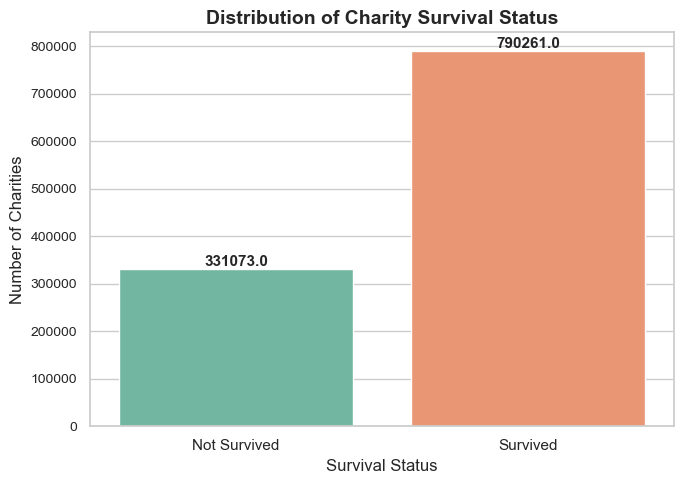

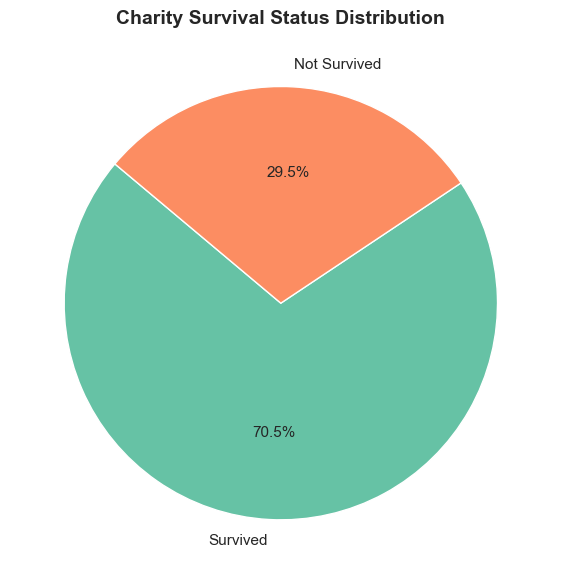

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
charity_df = pd.read_csv("cleaned gov charity data.csv")

# Set a nicer seaborn theme
sns.set_theme(style="whitegrid")

# -------- Bar Chart: Survival Distribution --------
plt.figure(figsize=(7, 5))
bar_palette = ['#66c2a5', '#fc8d62']  # Custom soft colors
ax = sns.countplot(data=charity_df, x='is_surviving', palette=bar_palette)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribution of Charity Survival Status', fontsize=14, fontweight='bold')
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Number of Charities', fontsize=12)
plt.xticks(ticks=[0,1], labels=['Not Survived', 'Survived'], fontsize=11)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# -------- Pie Chart: Survival Status --------
# Recalculate value counts just in case
survival_counts = charity_df['is_surviving'].value_counts()
labels = ['Survived', 'Not Survived'] if survival_counts.index[0] == 1 else ['Not Survived', 'Survived']
colors = ['#66c2a5', '#fc8d62']  # Match with bar chart

plt.figure(figsize=(6, 6))
plt.pie(
    survival_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11}
)
plt.title('Charity Survival Status Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:7: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  charity_df = pd.read_csv("cleaned gov charity data.csv")
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Survived', 'Survived'], fontsize=11)


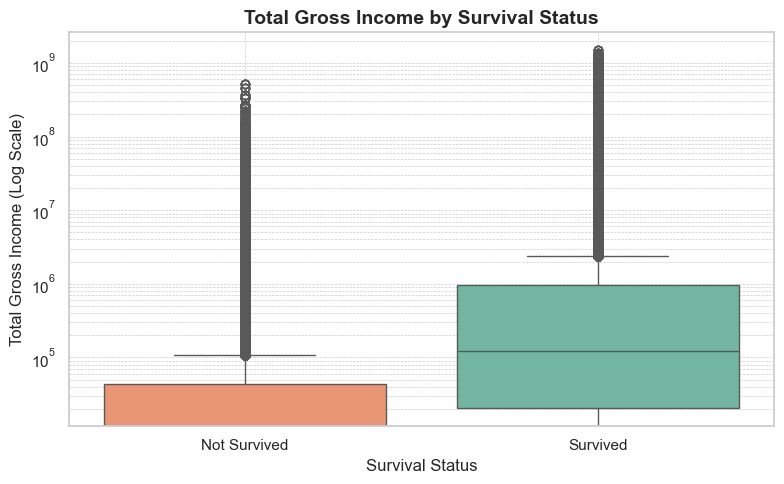

/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Survived', 'Survived'], fontsize=11)


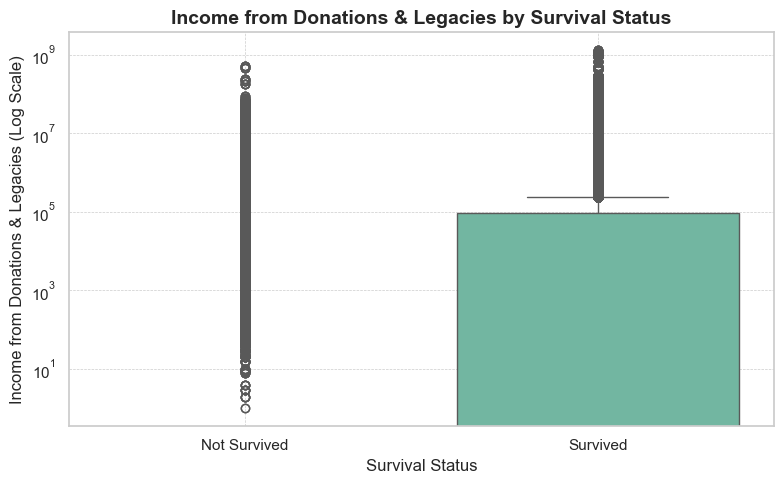

/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Survived', 'Survived'], fontsize=11)


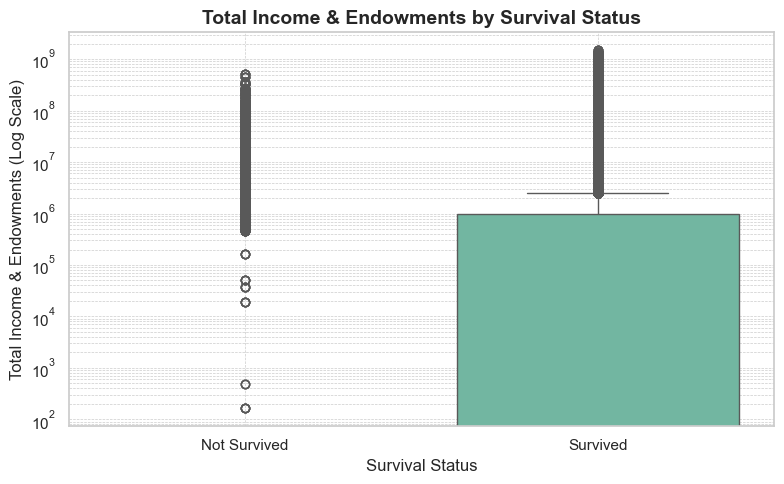

/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Survived', 'Survived'], fontsize=11)


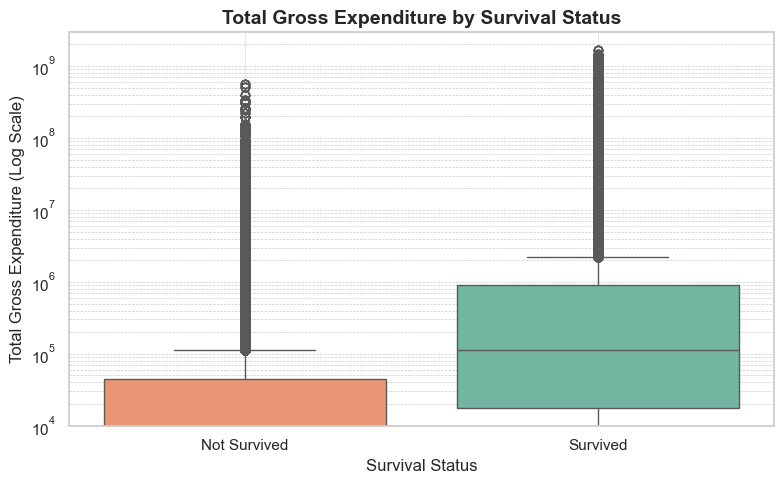

/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/3500298491.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Survived', 'Survived'], fontsize=11)


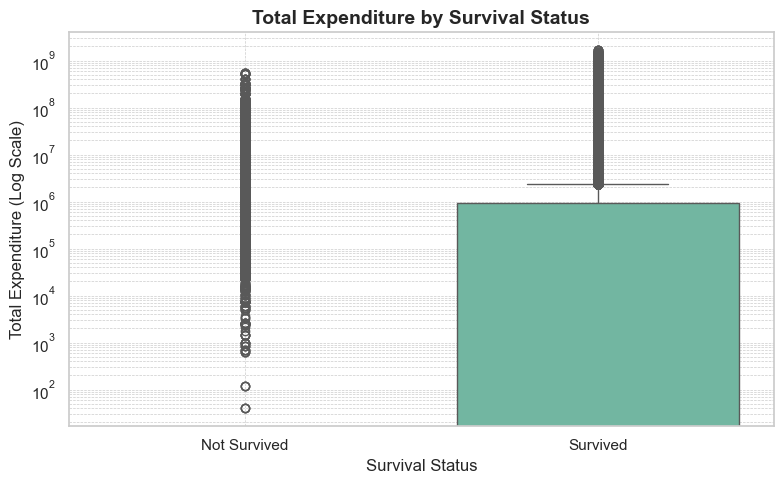

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
charity_df = pd.read_csv("cleaned gov charity data.csv")

# Set display and style
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Define financial columns of interest
financial_cols = [
    'total_gross_income',
    'income_donations_and_legacies',
    'income_total_income_and_endowments',
    'total_gross_expenditure',
    'expenditure_total'
]

# Rename for plotting
col_friendly_names = {
    'total_gross_income': 'Total Gross Income',
    'income_donations_and_legacies': 'Income from Donations & Legacies',
    'income_total_income_and_endowments': 'Total Income & Endowments',
    'total_gross_expenditure': 'Total Gross Expenditure',
    'expenditure_total': 'Total Expenditure'
}

# Convert financial columns to numeric
for col in financial_cols:
    charity_df[col] = pd.to_numeric(charity_df[col], errors='coerce')

# Cleaned dataframe
eda_df = charity_df[financial_cols + ['is_surviving']].replace([np.inf, -np.inf], np.nan).dropna()

# Improved color palette
custom_palette = ['#fc8d62', '#66c2a5']  # Not survived = orange, Survived = green

# Plot with enhancements
for col in financial_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.boxplot(
        data=eda_df,
        x='is_surviving',
        y=col,
        palette=custom_palette
    )
    plt.yscale('log')
    ax.set_xticklabels(['Not Survived', 'Survived'], fontsize=11)
    ax.set_title(f'{col_friendly_names[col]} by Survival Status', fontsize=14, fontweight='bold')
    ax.set_xlabel('Survival Status', fontsize=12)
    ax.set_ylabel(f'{col_friendly_names[col]} (Log Scale)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


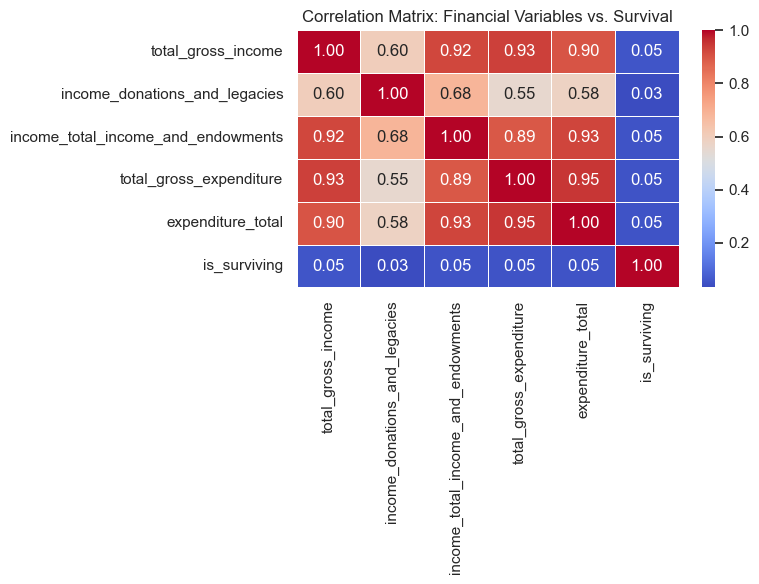

In [49]:
# ------------------------------
# 3. Correlation heatmap
# ------------------------------
corr_matrix = eda_df[financial_cols + ['is_surviving']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Financial Variables vs. Survival')
plt.tight_layout()
plt.show()


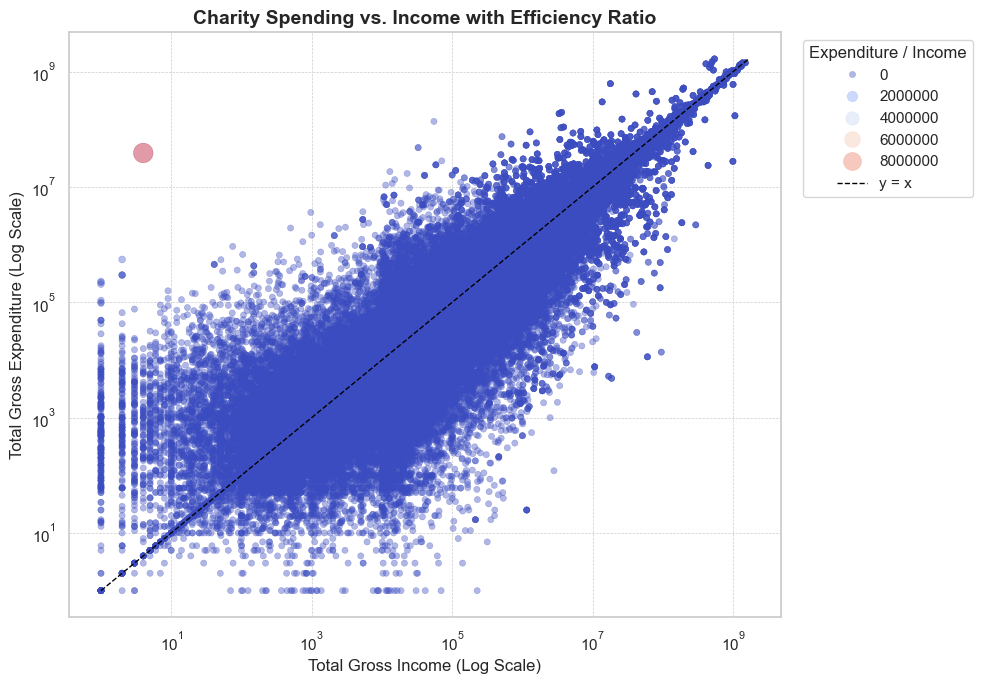

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned data
df = pd.read_csv("cleaned gov charity data.csv", low_memory=False)

# Ensure numeric types
df['total_gross_income'] = pd.to_numeric(df['total_gross_income'], errors='coerce')
df['total_gross_expenditure'] = pd.to_numeric(df['total_gross_expenditure'], errors='coerce')

# Filter invalid values
df_filtered = df[['total_gross_income', 'total_gross_expenditure']].replace(0, np.nan).dropna()

# Optional: Add a new column for "efficiency" or "spending ratio"
df_filtered['expenditure_to_income_ratio'] = df_filtered['total_gross_expenditure'] / df_filtered['total_gross_income']

# Plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    data=df_filtered,
    x='total_gross_income',
    y='total_gross_expenditure',
    hue='expenditure_to_income_ratio',
    palette='coolwarm',
    size='expenditure_to_income_ratio',
    sizes=(20, 200),
    alpha=0.4,
    edgecolor=None
)

# Reference line: y = x (perfect balance)
max_val = max(df_filtered['total_gross_income'].max(), df_filtered['total_gross_expenditure'].max())
plt.plot([1, max_val], [1, max_val], color='black', linestyle='--', linewidth=1, label='y = x')

# Set log scales
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel("Total Gross Income (Log Scale)", fontsize=12)
plt.ylabel("Total Gross Expenditure (Log Scale)", fontsize=12)
plt.title("Charity Spending vs. Income with Efficiency Ratio", fontsize=14, fontweight='bold')
plt.legend(title='Expenditure / Income', loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


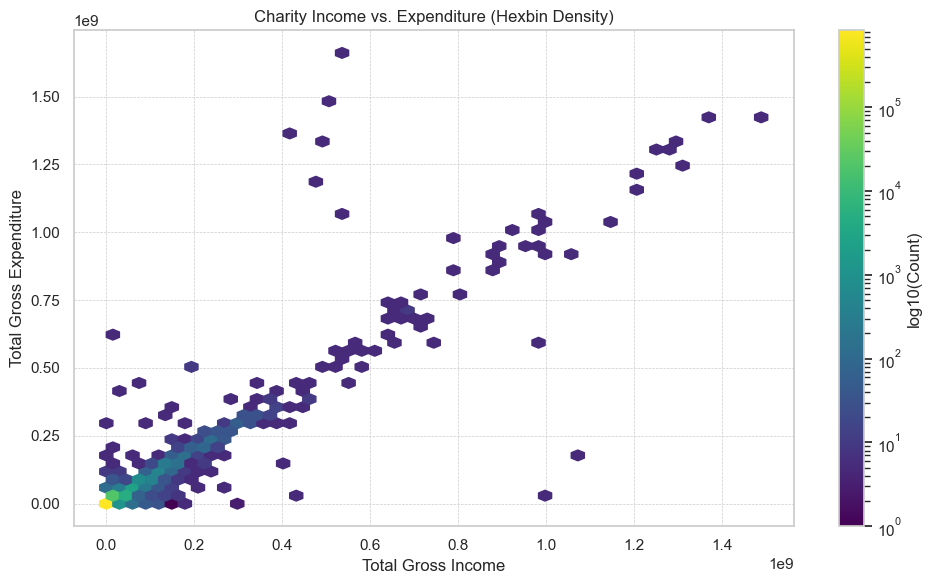

In [55]:
plt.figure(figsize=(10, 6))
plt.hexbin(
    df_filtered['total_gross_income'],
    df_filtered['total_gross_expenditure'],
    gridsize=50,
    cmap='viridis',
    bins='log'  # log color scaling
)
plt.colorbar(label='log10(Count)')
plt.xlabel("Total Gross Income")
plt.ylabel("Total Gross Expenditure")
plt.title("Charity Income vs. Expenditure (Hexbin Density)")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


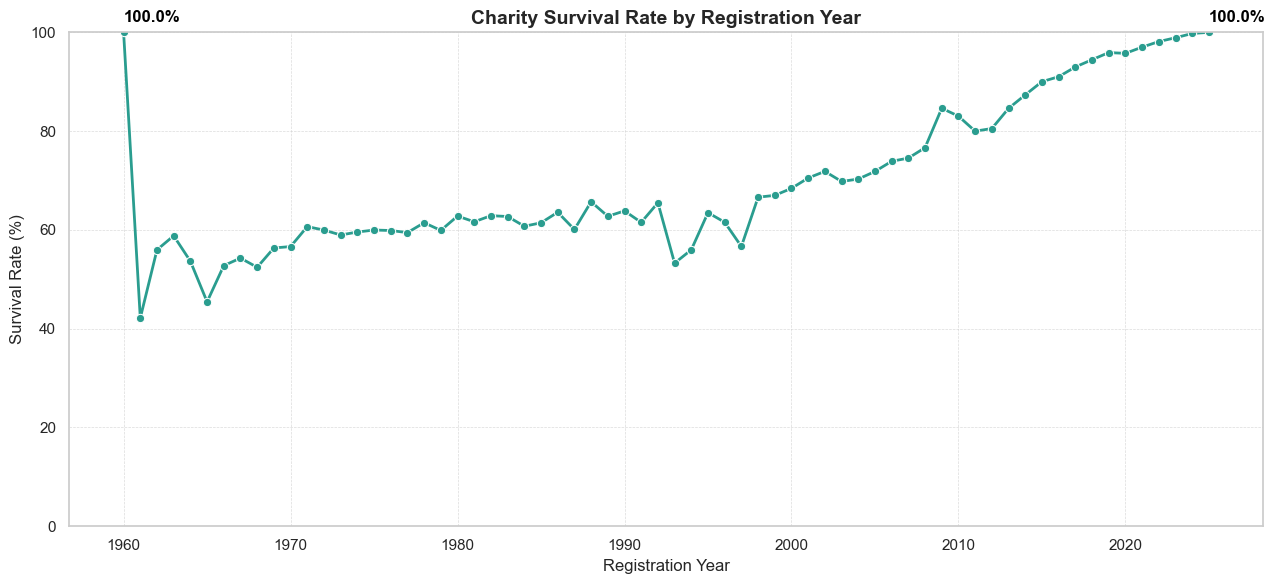

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean
df = pd.read_csv("cleaned gov charity data.csv", low_memory=False)
df['is_surviving'] = pd.to_numeric(df['is_surviving'], errors='coerce').fillna(0).astype(int)
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')
df['registration_year'] = df['date_of_registration'].dt.year
df = df.dropna(subset=['registration_year'])

# Aggregate
yearly = (
    df.groupby('registration_year')['is_surviving']
      .agg(total='count', survived='sum')
      .reset_index()
)
yearly['survival_rate'] = 100 * yearly['survived'] / yearly['total']

# Plot
plt.figure(figsize=(13, 6))
sns.lineplot(
    data=yearly,
    x='registration_year',
    y='survival_rate',
    marker='o',
    color='#2A9D8F',
    linewidth=2
)

# Add annotations for first and last year
plt.text(
    yearly['registration_year'].iloc[0],
    yearly['survival_rate'].iloc[0] + 2,
    f"{yearly['survival_rate'].iloc[0]:.1f}%",
    color='black',
    weight='bold'
)
plt.text(
    yearly['registration_year'].iloc[-1],
    yearly['survival_rate'].iloc[-1] + 2,
    f"{yearly['survival_rate'].iloc[-1]:.1f}%",
    color='black',
    weight='bold'
)

# Final touches
plt.title('Charity Survival Rate by Registration Year', fontsize=14, weight='bold')
plt.xlabel('Registration Year')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


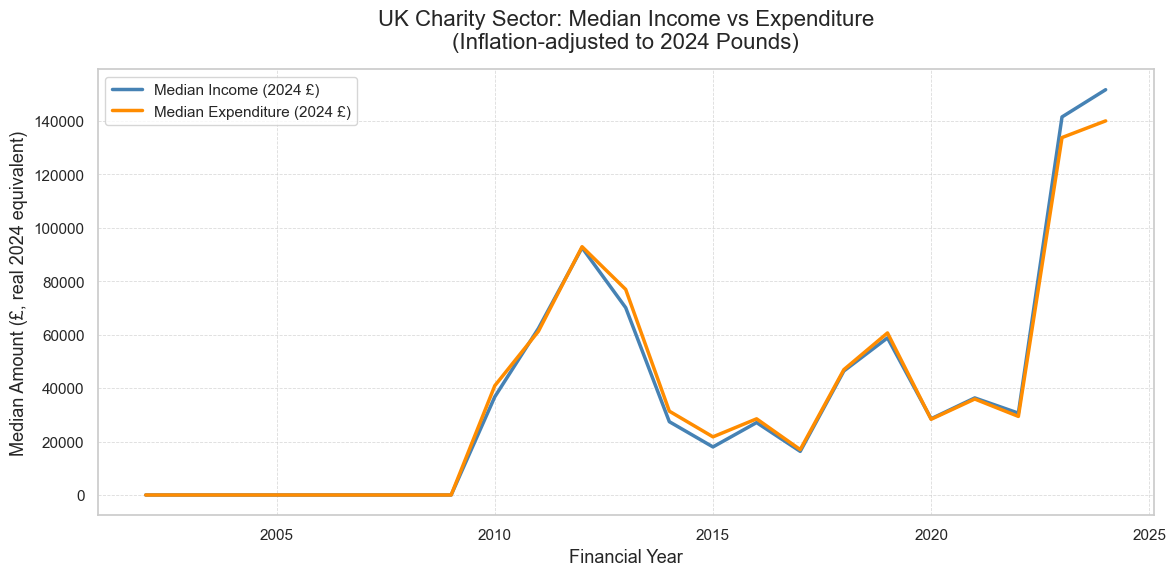

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load charity data ---
df = pd.read_csv("cleaned gov charity data.csv", low_memory=False)

# Convert financial columns
df['total_gross_income'] = pd.to_numeric(df['total_gross_income'], errors='coerce')
df['total_gross_expenditure'] = pd.to_numeric(df['total_gross_expenditure'], errors='coerce')

# Extract the year of latest financial accounts
df['accounts_year'] = pd.to_datetime(df['latest_acc_fin_period_end_date'], errors='coerce').dt.year

# Drop rows with missing years or financials
df = df.dropna(subset=['accounts_year', 'total_gross_income', 'total_gross_expenditure'])


# --- Step 2: Create CPI data (UK, ONS) ------------------------
# CPI Index – 2015 = 100
cpi_data = {
    # 1960‑1999 (rounded to 1 dp)
    1960:  6.9, 1961:  7.1, 1962:  7.3, 1963:  7.5, 1964:  7.7,
    1965:  8.0, 1966:  8.4, 1967:  8.7, 1968:  9.0, 1969:  9.5,
    1970: 10.1, 1971: 10.8, 1972: 11.9, 1973: 13.3, 1974: 15.2,
    1975: 17.1, 1976: 19.2, 1977: 21.3, 1978: 23.2, 1979: 25.8,
    1980: 31.5, 1981: 35.1, 1982: 37.3, 1983: 38.7, 1984: 40.1,
    1985: 41.4, 1986: 42.0, 1987: 43.4, 1988: 45.7, 1989: 48.3,
    1990: 51.6, 1991: 55.5, 1992: 57.3, 1993: 58.9, 1994: 60.1,
    1995: 61.2, 1996: 62.2, 1997: 63.2, 1998: 64.1, 1999: 66.6,
    # 2000‑2024 (your existing figures)
    2000: 71.3, 2001: 73.1, 2002: 74.8, 2003: 76.9, 2004: 78.7,
    2005: 80.9, 2006: 83.6, 2007: 86.9, 2008: 90.4, 2009: 90.5,
    2010: 93.2, 2011: 97.9, 2012: 100.0, 2013: 102.0, 2014: 103.6,
    2015: 100.0, 2016: 101.0, 2017: 103.5, 2018: 105.6, 2019: 107.5,
    2020: 109.0, 2021: 113.0, 2022: 123.8, 2023: 132.5, 2024: 136.0
}
cpi_df = pd.DataFrame(cpi_data.items(), columns=['accounts_year', 'cpi_index'])

# --- Step 3: Merge CPI to data & adjust for inflation ---
df = df.merge(cpi_df, on='accounts_year', how='left')

# CPI base year is 2024
cpi_base = cpi_data[2024]
df['cpi_factor'] = cpi_base / df['cpi_index']

# Adjust for inflation
df['income_real_2024'] = df['total_gross_income'] * df['cpi_factor']
df['expenditure_real_2024'] = df['total_gross_expenditure'] * df['cpi_factor']

# --- Step 4: Aggregate by year ---
median_by_year = (
    df.groupby('accounts_year')[['income_real_2024', 'expenditure_real_2024']]
    .median()
    .dropna()
    .reset_index()
)

# --- Step 5: Dissertation-style Plot ---

# Set a clean, academic style
sns.set_theme(style='whitegrid', font_scale=1.2, rc={
    "axes.titlesize": 16,
    "axes.labelsize": 13,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

# Create the plot
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=median_by_year,
    x='accounts_year',
    y='income_real_2024',
    label='Median Income (2024 £)',
    color='steelblue',
    linewidth=2.5
)

sns.lineplot(
    data=median_by_year,
    x='accounts_year',
    y='expenditure_real_2024',
    label='Median Expenditure (2024 £)',
    color='darkorange',
    linewidth=2.5
)

# Title and labels
plt.title("UK Charity Sector: Median Income vs Expenditure\n(Inflation-adjusted to 2024 Pounds)", pad=15)
plt.xlabel("Financial Year")
plt.ylabel("Median Amount (£, real 2024 equivalent)")
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.legend(loc='best')
plt.tight_layout()


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/1252248148.py:7: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  charity_df = pd.read_csv("cleaned gov charity data.csv")


✅ Frequency count of charities by 'charity_type':
charity_type
Charitable company     352639
Other                  340426
Unknown                156748
CIO                    147217
Trust                  103194
Previously excepted     21110
Name: count, dtype: int64


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/1252248148.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='viridis')


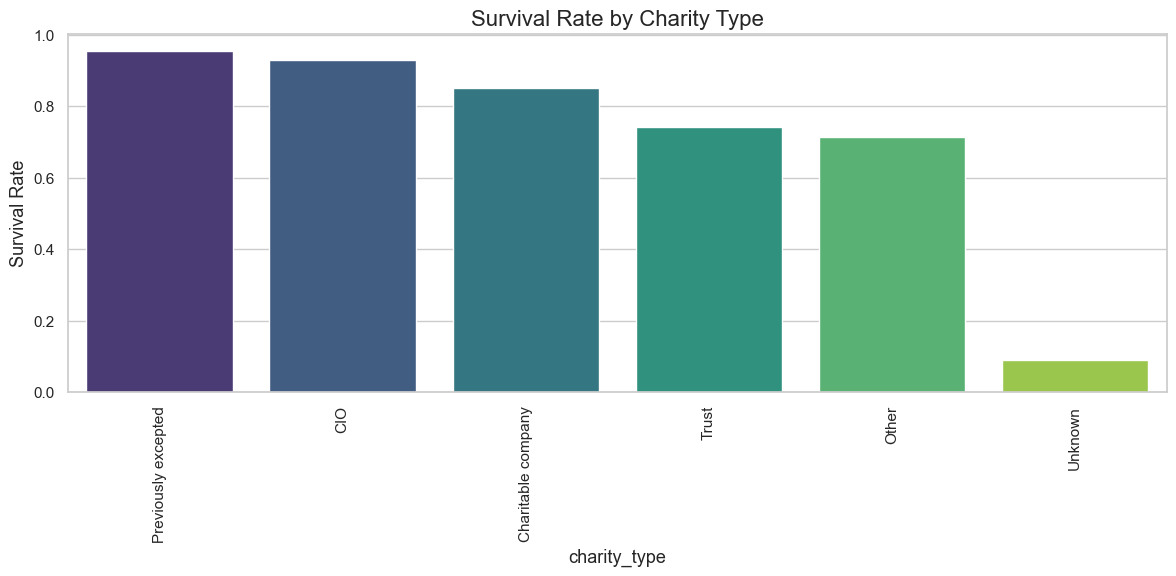


✅ Chi-Square Test Results:
Chi² statistic = 363442.92
Degrees of Freedom = 5
P-value = 0.0000
→ Statistically significant association between charity type and survival.


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load dataset
charity_df = pd.read_csv("cleaned gov charity data.csv")

# Focus on charity_type and is_surviving
df = charity_df[['charity_type', 'is_surviving']].dropna()

# ----------------------------------------
# 1. Frequency count of charities by type
# ----------------------------------------
print("✅ Frequency count of charities by 'charity_type':")
print(df['charity_type'].value_counts())

# ----------------------------------------
# 2. Bar chart: Survival rate by charity type
# ----------------------------------------
survival_rate = df.groupby('charity_type')['is_surviving'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Charity Type')
plt.tight_layout()
plt.show()

# ----------------------------------------
# 3. Chi-square test: Charity Type vs. Survival
# ----------------------------------------
contingency = pd.crosstab(df['charity_type'], df['is_surviving'])

chi2, p, dof, expected = chi2_contingency(contingency)

print("\n✅ Chi-Square Test Results:")
print(f"Chi² statistic = {chi2:.2f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

if p < 0.05:
    print("→ Statistically significant association between charity type and survival.")
else:
    print("→ No statistically significant association between charity type and survival.")


                   total_charities  survived_charities  survival_rate
RegAddress.County                                                    
ACTON                            5                   5         100.00
NOTTINGHAMSHIRE                 57                  57         100.00
NORTHAMPTONSHIRE                 6                   6         100.00
NORTH YORKSHIRE                 57                  57         100.00
MIDDX.                           4                   4         100.00
...                            ...                 ...            ...
CO DONEGAL                   61152               11716          19.16
SW20 OJH                     61152               11716          19.16
ANTRIM                       61152               11716          19.16
SURREY KT 138                61152               11716          19.16
WA3 UR                       61152               11716          19.16

[107 rows x 3 columns]


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/874665494.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


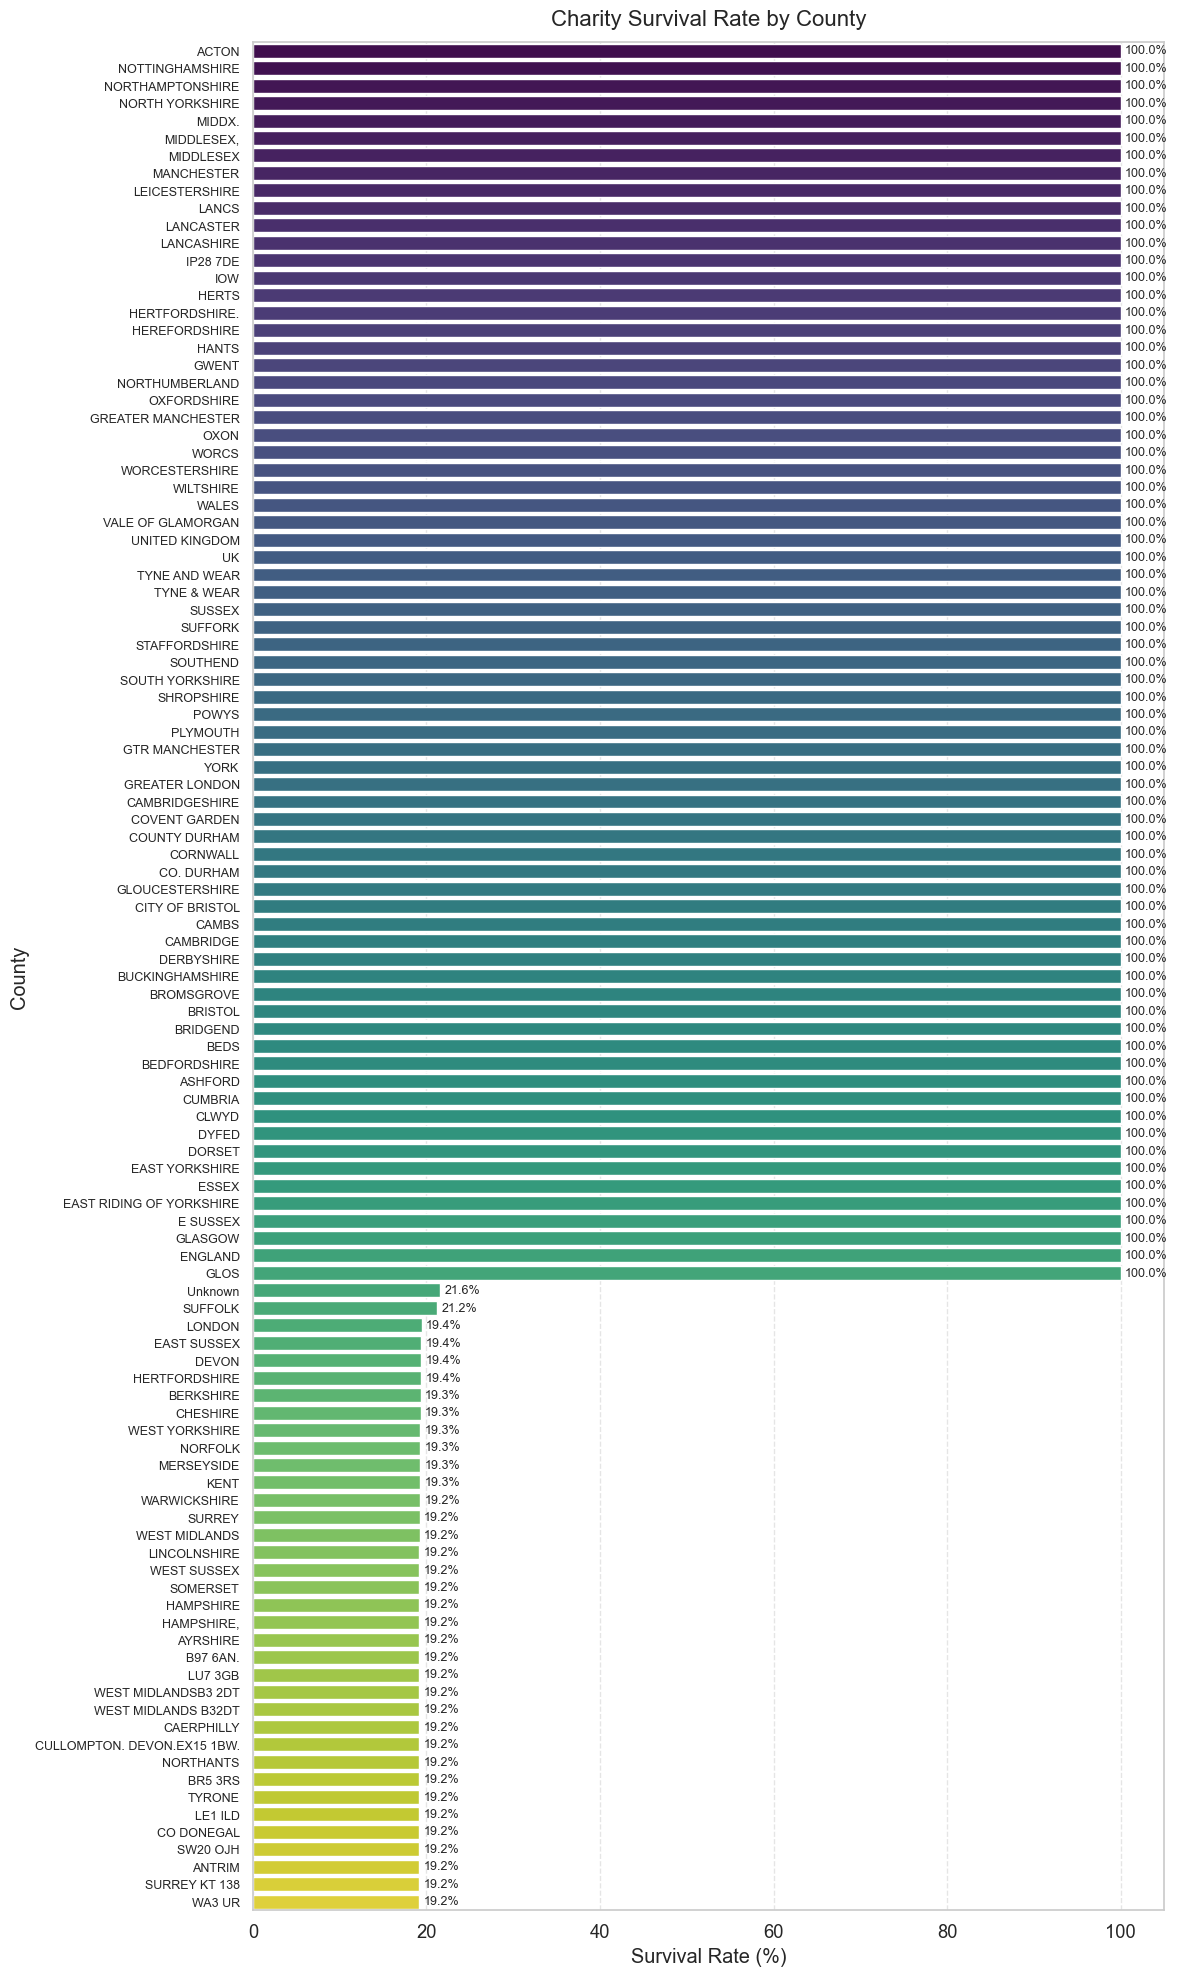

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by County to calculate charity survival rate
regional_survival = (
    merged_df
    .groupby('RegAddress.County')['is_surviving']
    .agg(total_charities='count', survived_charities='sum')
)

# Calculate survival rate percentage
regional_survival['survival_rate'] = (regional_survival['survived_charities'] / regional_survival['total_charities']) * 100

# Sort by survival rate descending
regional_survival = regional_survival.sort_values('survival_rate', ascending=False)


print(regional_survival)

# Set Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.2)

# Reset index for plotting
plot_data = regional_survival.reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

# Group by County to calculate charity survival rate
regional_survival = (
    merged_df
    .groupby('RegAddress.County')['is_surviving']
    .agg(total_charities='count', survived_charities='sum')
)

# Calculate survival rate percentage
regional_survival['survival_rate'] = (
    regional_survival['survived_charities'] / regional_survival['total_charities'] * 100
)

# Sort by survival rate descending
regional_survival = regional_survival.sort_values('survival_rate', ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 20))
ax = sns.barplot(
    data=regional_survival,
    x='survival_rate',
    y='RegAddress.County',
    palette='viridis'
)

# Add text labels for each bar
for i, row in regional_survival.iterrows():
    ax.text(
        row['survival_rate'] + 0.5,  # Slightly to the right of the bar
        i,                           # Vertical position (index)
        f"{row['survival_rate']:.1f}%",  # Format label
        va='center', ha='left', fontsize=9
    )

# Title and axis labels
plt.title('Charity Survival Rate by County', fontsize=16, pad=12)
plt.xlabel('Survival Rate (%)')
plt.ylabel('County')
plt.xlim(0, 105)  # Extend limit slightly for labels
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.yticks(fontsize=9)  # or 8 if needed
plt.tight_layout()
plt.show()


In [74]:
# Create contingency table
contingency = pd.crosstab(merged_df['RegAddress.County'], merged_df['is_surviving'])

# Perform chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print("✅ There is a statistically significant relationship between region and survival.")
else:
    print("❌ No statistically significant relationship found between region and survival.")


Chi-square statistic: 12942.88
p-value: 0.0000
✅ There is a statistically significant relationship between region and survival.


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/2123347400.py:6: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  charity_df = pd.read_csv("cleaned gov charity data.csv")


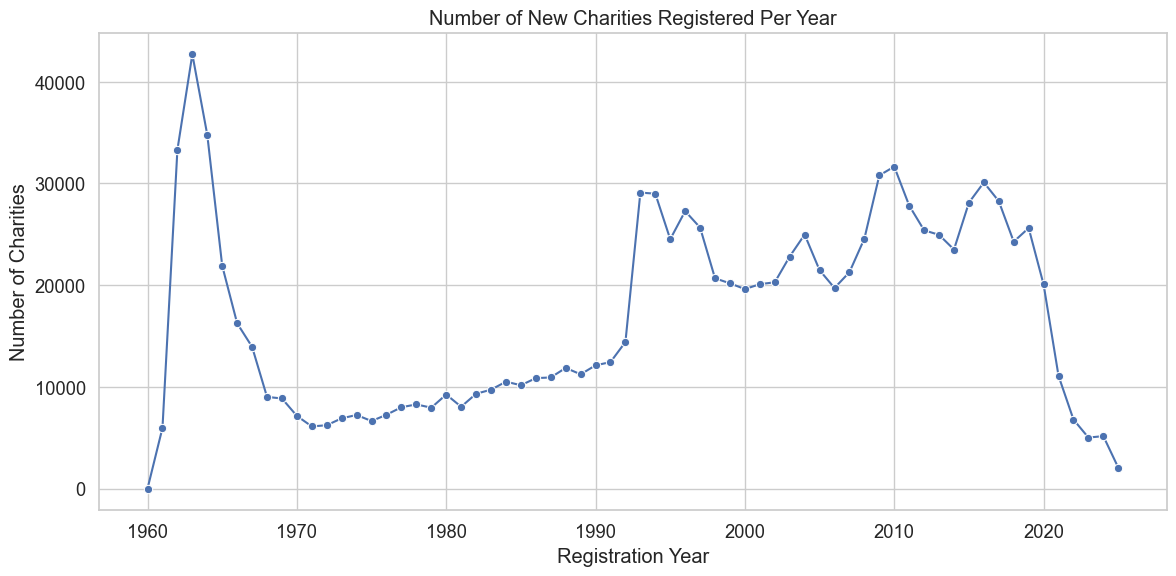

/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/2123347400.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cohort_stats.index, y=cohort_stats['survival_rate'], palette='Blues_d')


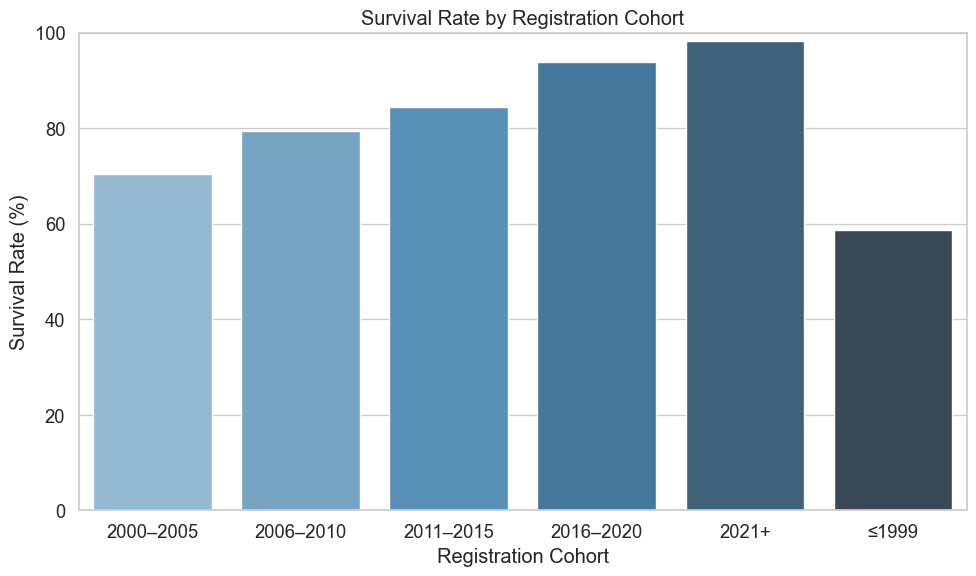

      cohort charity_contact_address4  count  sum  survival_rate
0  2000–2005             04270 Sorbas      5    5         100.00
1  2000–2005         1 Duchess Street      1    1         100.00
2  2000–2005        10 Bloomsbury Way      2    2         100.00
3  2000–2005        100 Drummond Road      5    5         100.00
4  2000–2005     100 Hammersmith Road     25   25         100.00


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned charity dataset
charity_df = pd.read_csv("cleaned gov charity data.csv")

# -------------------------------
# 1. Create 'registration_year'
# -------------------------------
charity_df['date_of_registration'] = pd.to_datetime(charity_df['date_of_registration'], errors='coerce')
charity_df['registration_year'] = charity_df['date_of_registration'].dt.year

# Drop if registration year missing
charity_df = charity_df.dropna(subset=['registration_year'])

# -------------------------------
# 2. Trend: number of charities registered per year
# -------------------------------
reg_per_year = charity_df['registration_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=reg_per_year.index, y=reg_per_year.values, marker='o')
plt.title("Number of New Charities Registered Per Year")
plt.xlabel("Registration Year")
plt.ylabel("Number of Charities")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 3. Add cohorts (e.g., 2000–2005)
# -------------------------------
def assign_cohort(year):
    if pd.isnull(year):
        return "Unknown"
    elif year <= 1999:
        return "≤1999"
    elif year <= 2005:
        return "2000–2005"
    elif year <= 2010:
        return "2006–2010"
    elif year <= 2015:
        return "2011–2015"
    elif year <= 2020:
        return "2016–2020"
    else:
        return "2021+"

charity_df['cohort'] = charity_df['registration_year'].apply(assign_cohort)

# -------------------------------
# 4. Survival rate by cohort
# -------------------------------
cohort_stats = (
    charity_df
    .groupby('cohort')['is_surviving']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'total', 'sum': 'survived'})
)
cohort_stats['survival_rate'] = (cohort_stats['survived'] / cohort_stats['total']) * 100
cohort_stats = cohort_stats.sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cohort_stats.index, y=cohort_stats['survival_rate'], palette='Blues_d')
plt.title("Survival Rate by Registration Cohort")
plt.xlabel("Registration Cohort")
plt.ylabel("Survival Rate (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Survival rate by cohort & region (optional)
# -------------------------------
# You can use 'charity_contact_postcode' or 'charity_contact_address4' as region proxies
# Example with 'charity_contact_address4' as region:

regional_cohort = (
    charity_df
    .groupby(['cohort', 'charity_contact_address4'])['is_surviving']
    .agg(['count', 'sum'])
    .reset_index()
)
regional_cohort['survival_rate'] = (regional_cohort['sum'] / regional_cohort['count']) * 100

# Display example
print(regional_cohort.head())


In [78]:
import scipy.stats as stats
import pandas as pd

# Ensure 'cohort' and 'is_surviving' exist in charity_df
assert 'cohort' in charity_df.columns, "Missing 'cohort' column in charity_df"
assert 'is_surviving' in charity_df.columns, "Missing 'is_surviving' column in charity_df"

# Create contingency table
cohort_survival_ct = pd.crosstab(charity_df['cohort'], charity_df['is_surviving'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(cohort_survival_ct)

# Print results
print("Chi-Square Test: Cohort vs. Survival")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("✅ Result: Statistically significant association between cohort and survival.")
else:
    print("❌ Result: No significant association between cohort and survival.")


Chi-Square Test: Cohort vs. Survival
Chi2 Statistic: 100271.9859
Degrees of Freedom: 5
P-value: 0.0000
✅ Result: Statistically significant association between cohort and survival.


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/1374310809.py:6: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  charity_df = pd.read_csv("cleaned gov charity data.csv")


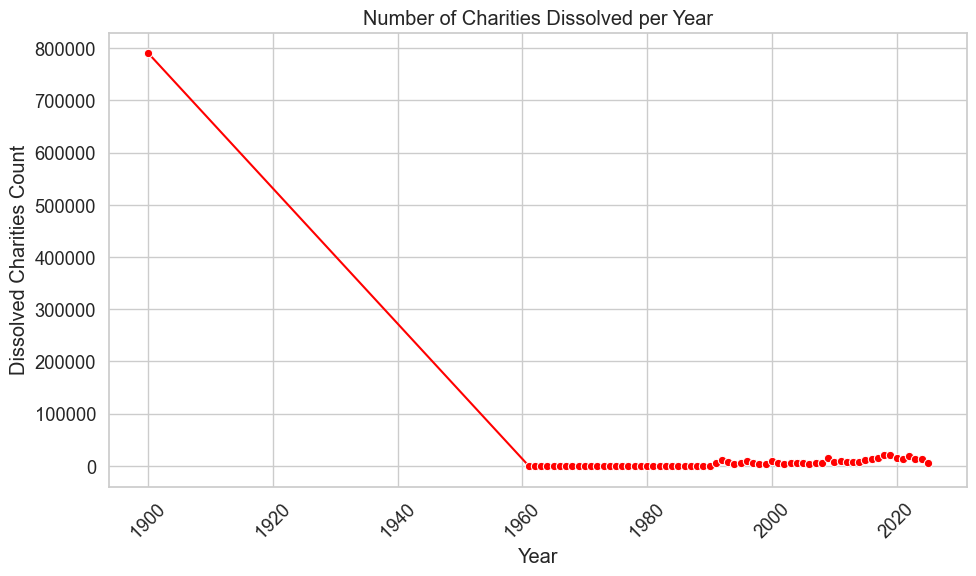

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned charity dataset
charity_df = pd.read_csv("cleaned gov charity data.csv")

# Convert 'date_of_removal' to datetime
charity_df['date_of_removal'] = pd.to_datetime(charity_df['date_of_removal'], errors='coerce')

# Extract year of removal
charity_df['removal_year'] = charity_df['date_of_removal'].dt.year

# Drop NaNs (charities not removed/dissolved)
dissolved_df = charity_df.dropna(subset=['removal_year'])

# Count number of dissolutions per year
dissolution_counts = dissolved_df['removal_year'].value_counts().sort_index()

# Plot trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=dissolution_counts.index, y=dissolution_counts.values, marker='o', color='red')
plt.title('Number of Charities Dissolved per Year')
plt.xlabel('Year')
plt.ylabel('Dissolved Charities Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [82]:
import pandas as pd

# Load cleaned charity dataset
charity_df = pd.read_csv("cleaned gov charity data.csv")

# Convert 'date_of_removal' to datetime
charity_df['date_of_removal'] = pd.to_datetime(charity_df['date_of_removal'], errors='coerce')

# Extract year of removal
charity_df['removal_year'] = charity_df['date_of_removal'].dt.year

# Drop NaNs (charities not removed/dissolved)
dissolved_df = charity_df.dropna(subset=['removal_year'])

# Count number of dissolutions per year and create a table
dissolution_table = dissolved_df['removal_year'].value_counts().sort_index().reset_index()
dissolution_table.columns = ['Year', 'Number of Charities Dissolved']

# Display the table
print(dissolution_table.to_string(index=False))


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7307/2717103060.py:4: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  charity_df = pd.read_csv("cleaned gov charity data.csv")


 Year  Number of Charities Dissolved
 1900                         790261
 1961                            295
 1962                            100
 1963                            141
 1964                            138
 1965                            105
 1966                            111
 1967                             98
 1968                             92
 1969                             60
 1970                             80
 1971                             85
 1972                            125
 1973                            146
 1974                            148
 1975                            139
 1976                            121
 1977                            191
 1978                            161
 1979                            125
 1980                            181
 1981                            124
 1982                            154
 1983                            162
 1984                            169
 1985                            141
 

In [91]:
print(df.columns.tolist())

['date_of_extract_x', 'organisation_number', 'registered_charity_number_x', 'linked_charity_number', 'charity_name', 'charity_type', 'charity_registration_status', 'date_of_registration', 'date_of_removal', 'charity_reporting_status', 'latest_acc_fin_period_start_date', 'latest_acc_fin_period_end_date', 'latest_income', 'latest_expenditure', 'charity_contact_address1', 'charity_contact_address2', 'charity_contact_address3', 'charity_contact_address4', 'charity_contact_postcode', 'charity_contact_phone', 'charity_contact_email', 'charity_contact_web', 'charity_company_registration_number', 'charity_insolvent', 'charity_in_administration', 'charity_previously_excepted', 'charity_is_cio', 'cio_is_dissolved', 'charity_activities', 'charity_gift_aid', 'charity_has_land', 'date_of_extract_y', 'registered_charity_number_y', 'latest_fin_period_submitted_ind_x', 'fin_period_order_number_x', 'ar_cycle_reference_x', 'fin_period_start_date_x', 'fin_period_end_date_x', 'ar_due_date_x', 'ar_received

In [29]:
import pandas as pd

# Load the cleaned CSV
df = pd.read_csv("cleaned gov charity data.csv")

# Print column names
print("Columns in the dataset:")
print(df.columns.tolist())


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_1006/403804675.py:4: DtypeWarning: Columns (25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned gov charity data.csv")


Columns in the dataset:
['date_of_extract_x', 'organisation_number', 'registered_charity_number_x', 'linked_charity_number', 'charity_name', 'charity_type', 'charity_registration_status', 'date_of_registration', 'date_of_removal', 'charity_reporting_status', 'latest_acc_fin_period_start_date', 'latest_acc_fin_period_end_date', 'latest_income', 'latest_expenditure', 'charity_contact_address1', 'charity_contact_address2', 'charity_contact_address3', 'charity_contact_address4', 'charity_contact_postcode', 'charity_contact_phone', 'charity_contact_email', 'charity_contact_web', 'charity_company_registration_number', 'charity_insolvent', 'charity_in_administration', 'charity_previously_excepted', 'charity_is_cio', 'cio_is_dissolved', 'charity_activities', 'charity_gift_aid', 'charity_has_land', 'date_of_extract_y', 'registered_charity_number_y', 'latest_fin_period_submitted_ind_x', 'fin_period_order_number_x', 'ar_cycle_reference_x', 'fin_period_start_date_x', 'fin_period_end_date_x', 'ar_d

In [31]:
import pandas as pd

# Load the cleaned CSV
df = pd.read_csv("Cleaned House data.csv")

# Print column names
print("Columns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['CompanyName', 'CompanyNumber', 'RegAddress.AddressLine1', 'RegAddress.AddressLine2', 'RegAddress.PostTown', 'RegAddress.County', 'RegAddress.Country', 'RegAddress.PostCode', 'CompanyCategory', 'CompanyStatus', 'CountryOfOrigin', 'IncorporationDate', 'Accounts.AccountRefDay', 'Accounts.AccountRefMonth', 'Accounts.NextDueDate', 'Accounts.LastMadeUpDate', 'Accounts.AccountCategory', 'Returns.NextDueDate', 'Mortgages.NumMortCharges', 'Mortgages.NumMortOutstanding', 'Mortgages.NumMortPartSatisfied', 'Mortgages.NumMortSatisfied', 'SICCode.SicText_1', 'LimitedPartnerships.NumGenPartners', 'LimitedPartnerships.NumLimPartners', 'URI', 'ConfStmtNextDueDate', 'ConfStmtLastMadeUpDate']


In [29]:
# ===========================================================
# FINAL FEATURE ENGINEERING WITHOUT MERGE
# For modeling survivability of charitable organisations
# ===========================================================

import pandas as pd
import numpy as np

# -------------------------------
# LOAD DATASETS
# -------------------------------
gov_df = pd.read_csv("cleaned gov charity data.csv", usecols=[
    "is_surviving", "date_of_registration", "charity_contact_postcode",
    "latest_income", "latest_expenditure",
    "total_gross_income", "total_gross_expenditure",
    "income_from_government_grants", "reserves",
    "count_volunteers", "count_employees",
    "charity_raises_funds_from_public",
    "charity_professional_fundraiser",
    "grant_making_is_main_activity",
    "charity_receives_govt_funding_contracts",
    "charity_receives_govt_funding_grants",
    "charity_has_trading_subsidiary",
    "charity_is_cio"
])

house_df = pd.read_csv("Cleaned House data.csv", usecols=[
    "SICCode.SicText_1", "CompanyStatus", "RegAddress.PostCode",
    "Mortgages.NumMortCharges", "Mortgages.NumMortSatisfied"
])

# -------------------------------
# HANDLE MISSING VALUES FOR FINANCIALS
# -------------------------------
fin_cols = [
    "latest_income", "latest_expenditure",
    "total_gross_income", "total_gross_expenditure",
    "income_from_government_grants", "reserves",
    "count_volunteers", "count_employees"
]
gov_df[fin_cols] = gov_df[fin_cols].fillna(0)

# -------------------------------
# FINANCIAL RATIOS
# -------------------------------
gov_df["income_expenditure_ratio"]   = gov_df["latest_income"] / (gov_df["latest_expenditure"] + 1)
gov_df["gov_grant_dependency"]       = gov_df["income_from_government_grants"] / (gov_df["latest_income"] + 1)
gov_df["gross_income_per_volunteer"] = gov_df["total_gross_income"] / (gov_df["count_volunteers"] + 1)
gov_df["gross_income_per_employee"]  = gov_df["total_gross_income"] / (gov_df["count_employees"] + 1)
gov_df["reserves_ratio"]             = gov_df["reserves"] / (gov_df["total_gross_expenditure"] + 1)

# -------------------------------
# CHARITY AGE + COHORT
# -------------------------------
gov_df["date_of_registration"] = pd.to_datetime(gov_df["date_of_registration"], errors="coerce")
gov_df["charity_age"] = (2025 - gov_df["date_of_registration"].dt.year).clip(lower=0)

def cohort_band(year):
    if pd.isnull(year): return "Unknown"
    if year <= 1999: return "≤1999"
    if year <= 2005: return "2000–2005"
    if year <= 2010: return "2006–2010"
    if year <= 2015: return "2011–2015"
    if year <= 2020: return "2016–2020"
    return "2021+"

gov_df["cohort"] = gov_df["date_of_registration"].dt.year.map(cohort_band)

# -------------------------------
# MORTGAGE ACTIVITY (SOCIOECONOMIC)
# -------------------------------
house_df["mortgage_activity"] = house_df[[
    "Mortgages.NumMortCharges", "Mortgages.NumMortSatisfied"
]].fillna(0).sum(axis=1)

# -------------------------------
# SECTOR & STATUS
# -------------------------------
house_df["sector"] = house_df["SICCode.SicText_1"].fillna("Unknown")
house_df["company_status"] = house_df["CompanyStatus"].fillna("Unknown")

top_sectors = house_df["sector"].value_counts().nlargest(15).index
house_df["sector"] = house_df["sector"].where(house_df["sector"].isin(top_sectors), "Other")

top_status = house_df["company_status"].value_counts().nlargest(15).index
house_df["company_status"] = house_df["company_status"].where(house_df["company_status"].isin(top_status), "Other")

# -------------------------------
# GOVERNANCE FLAGS
# -------------------------------
binary_cols = [
    "charity_raises_funds_from_public",
    "charity_professional_fundraiser",
    "grant_making_is_main_activity",
    "charity_receives_govt_funding_contracts",
    "charity_receives_govt_funding_grants",
    "charity_has_trading_subsidiary",
    "charity_is_cio"
]
yes_no_map = {"Yes": 1, "True": 1, "No": 0, "False": 0, "UNKNOWN": 0, "Unknown": 0}
for col in binary_cols:
    gov_df[col] = gov_df[col].replace(yes_no_map).fillna(0).astype(int)

# -------------------------------
# POSTCODE REGION PROXY (NO MERGE)
# -------------------------------
def extract_postcode_area(pc):
    if isinstance(pc, str) and len(pc.strip()) > 1:
        return pc.strip().split(" ")[0][:2].upper()
    return "Unknown"

gov_df["region"] = gov_df["charity_contact_postcode"].map(extract_postcode_area)
house_df["region_house"] = house_df["RegAddress.PostCode"].map(extract_postcode_area)

top_regions = gov_df["region"].value_counts().nlargest(15).index
gov_df["region"] = gov_df["region"].where(gov_df["region"].isin(top_regions), "Other")

# -------------------------------
# COMBINE FINAL FEATURES
# -------------------------------
X = pd.DataFrame()

# Numeric features
X["charity_age"] = gov_df["charity_age"]
X["income_expenditure_ratio"] = gov_df["income_expenditure_ratio"]
X["gov_grant_dependency"] = gov_df["gov_grant_dependency"]
X["gross_income_per_volunteer"] = gov_df["gross_income_per_volunteer"]
X["gross_income_per_employee"] = gov_df["gross_income_per_employee"]
X["reserves_ratio"] = gov_df["reserves_ratio"]
X["mortgage_activity"] = house_df["mortgage_activity"]

# Binary governance flags
for col in binary_cols:
    X[col] = gov_df[col]

# Categorical features
X["sector"] = house_df["sector"]
X["company_status"] = house_df["company_status"]
X["cohort"] = gov_df["cohort"]
X["region"] = gov_df["region"]  # Postcode-based charity region

# Target variable
y = gov_df["is_surviving"].astype(int)

# Final column types
numeric_cols = [
    "charity_age", "income_expenditure_ratio", "gov_grant_dependency",
    "gross_income_per_volunteer", "gross_income_per_employee",
    "reserves_ratio", "mortgage_activity"
]
categorical_cols = ["sector", "company_status", "cohort", "region"]

print("✅ Feature matrix shape:", X.shape)
print("✅ Target shape:", y.shape)
print("📊 Survival rate (%):", round(y.mean() * 100, 2))


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7687/1453412752.py:12: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  gov_df = pd.read_csv("cleaned gov charity data.csv", usecols=[
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7687/1453412752.py:102: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gov_df[col] = gov_df[col].replace(yes_no_map).fillna(0).astype(int)
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_7687/1453412752.py:102: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

✅ Feature matrix shape: (1121334, 18)
✅ Target shape: (1121334,)
📊 Survival rate (%): 70.48


/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_1881/482440743.py:23: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  gov_df = pd.read_csv("cleaned gov charity data.csv", usecols=[
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_1881/482440743.py:125: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gov_df[col] = gov_df[col].replace(yes_no_map).fillna(0).astype(int)
/var/folders/8w/qkgpp5cx5gbd6v2vcgffvnp80000gn/T/ipykernel_1881/482440743.py:125: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futur

✅ Classification Report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     82768
           1       1.00      0.96      0.98    197566

    accuracy                           0.97    280334
   macro avg       0.96      0.98      0.97    280334
weighted avg       0.98      0.97      0.97    280334



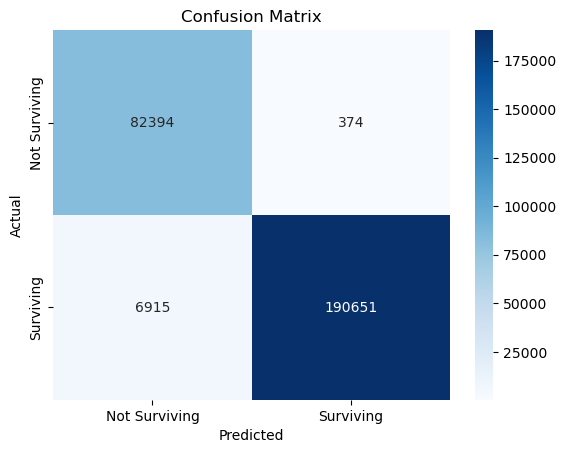

In [17]:
# ===========================================================
# LOGISTIC REGRESSION MODELING PIPELINE
# For predicting charity survivability
# With improved financial health features
# ===========================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# ===========================================================
# LOAD AND ENGINEER DATA
# ===========================================================

gov_df = pd.read_csv("cleaned gov charity data.csv", usecols=[
    "is_surviving", "date_of_registration", "charity_contact_postcode",
    "latest_income", "latest_expenditure",
    "total_gross_income", "total_gross_expenditure",
    "income_from_government_grants", "reserves",
    "count_volunteers", "count_employees",
    "charity_raises_funds_from_public",
    "charity_professional_fundraiser",
    "grant_making_is_main_activity",
    "charity_receives_govt_funding_contracts",
    "charity_receives_govt_funding_grants",
    "charity_has_trading_subsidiary",
    "charity_is_cio"
])

# -------------------------------
# IMPROVED FINANCIAL FEATURES
# -------------------------------
fin_cols = [
    "latest_income", "latest_expenditure",
    "total_gross_income", "total_gross_expenditure",
    "income_from_government_grants", "reserves"
]

for col in fin_cols:
    gov_df[col] = pd.to_numeric(gov_df[col], errors='coerce')
    gov_df[col] = gov_df[col].clip(lower=0).fillna(0)

gov_df["has_surplus"] = (gov_df["latest_income"] > gov_df["latest_expenditure"]).astype(int)

gov_df["efficiency_ratio"] = np.where(
    gov_df["latest_expenditure"] > 0,
    (gov_df["latest_income"] / gov_df["latest_expenditure"]).clip(0, 5),
    0
)

gov_df["reserve_months"] = np.where(
    gov_df["latest_expenditure"] > 0,
    (gov_df["reserves"] / (gov_df["latest_expenditure"] / 12)).clip(0, 36),
    0
)

gov_df["log_income"] = np.log1p(gov_df["latest_income"])
gov_df["log_reserves"] = np.log1p(gov_df["reserves"])

gov_df["gov_dependency"] = np.where(
    gov_df["latest_income"] > 0,
    (gov_df["income_from_government_grants"] / gov_df["latest_income"]).clip(0, 1),
    0
)

def financial_health_category(row):
    if row["latest_income"] == 0 and row["latest_expenditure"] == 0:
        return "No Financial Data"
    elif row["has_surplus"] == 1 and row["reserve_months"] > 6:
        return "Financially Healthy"
    elif row["has_surplus"] == 1:
        return "Surplus but Low Reserves"
    elif row["efficiency_ratio"] > 0.8:
        return "Tight but Viable"
    else:
        return "Financial Stress"

gov_df["financial_health_category"] = gov_df.apply(financial_health_category, axis=1)

# -------------------------------
# NON-FINANCIAL FEATURES
# -------------------------------
gov_df["date_of_registration"] = pd.to_datetime(gov_df["date_of_registration"], errors="coerce")
gov_df["charity_age"] = (2025 - gov_df["date_of_registration"].dt.year).clip(lower=0)

def cohort_band(year):
    if pd.isnull(year): return "Unknown"
    if year <= 1999: return "≤1999"
    if year <= 2005: return "2000–2005"
    if year <= 2010: return "2006–2010"
    if year <= 2015: return "2011–2015"
    if year <= 2020: return "2016–2020"
    return "2021+"

gov_df["cohort"] = gov_df["date_of_registration"].dt.year.map(cohort_band)

def extract_postcode_area(pc):
    if isinstance(pc, str) and len(pc.strip()) > 1:
        return pc.strip().split(" ")[0][:2].upper()
    return "Unknown"

gov_df["region"] = gov_df["charity_contact_postcode"].map(extract_postcode_area)
top_regions = gov_df["region"].value_counts().nlargest(15).index
gov_df["region"] = gov_df["region"].where(gov_df["region"].isin(top_regions), "Other")

binary_cols = [
    "charity_raises_funds_from_public",
    "charity_professional_fundraiser", 
    "grant_making_is_main_activity",
    "charity_receives_govt_funding_contracts",
    "charity_receives_govt_funding_grants",
    "charity_has_trading_subsidiary",
    "charity_is_cio"
]
yes_no_map = {"Yes": 1, "True": 1, "No": 0, "False": 0, "UNKNOWN": 0, "Unknown": 0}
for col in binary_cols:
    gov_df[col] = gov_df[col].replace(yes_no_map).fillna(0).astype(int)

# -------------------------------
# MODEL INPUTS
# -------------------------------
X = pd.DataFrame()
X["has_surplus"] = gov_df["has_surplus"]
X["efficiency_ratio"] = gov_df["efficiency_ratio"]
X["reserve_months"] = gov_df["reserve_months"]
X["log_income"] = gov_df["log_income"]
X["log_reserves"] = gov_df["log_reserves"]
X["gov_dependency"] = gov_df["gov_dependency"]
X["charity_age"] = gov_df["charity_age"]

for col in binary_cols:
    X[col] = gov_df[col]

X["cohort"] = gov_df["cohort"]
X["region"] = gov_df["region"]
X["financial_health_category"] = gov_df["financial_health_category"]

y = gov_df["is_surviving"].astype(int)

numeric_cols = [
    "has_surplus", "efficiency_ratio", "reserve_months",
    "log_income", "log_reserves", "gov_dependency", "charity_age"
] + binary_cols

categorical_cols = ["cohort", "region", "financial_health_category"]

# ===========================================================
# MODEL TRAINING
# ===========================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver='liblinear'))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", 
            xticklabels=["Not Surviving", "Surviving"], 
            yticklabels=["Not Surviving", "Surviving"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [19]:


# ===========================================================
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names = numeric_cols + list(cat_feature_names)

coefficients = model.named_steps["classifier"].coef_[0]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})
coef_df["AbsCoefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("AbsCoefficient", ascending=False)

friendly_mapping = {
    "has_surplus": "Has Surplus",
    "efficiency_ratio": "Efficiency Ratio",
    "reserve_months": "Months of Reserves",
    "log_income": "Log Income",
    "log_reserves": "Log Reserves",
    "gov_dependency": "Government Dependency",
    "charity_age": "Charity Age",
    "financial_health_category_Tight but Viable": "Tight but Viable",
    "financial_health_category_Surplus but Low Reserves": "Surplus but Low Reserves",
    # Add more mappings as needed...
}

coef_df["FriendlyName"] = coef_df["Feature"].map(friendly_mapping).fillna(coef_df["Feature"])

top_factors = coef_df[["Feature", "FriendlyName", "Coefficient"]].head(20)
print("\n🔍 Top Survival Factors (Improved Model):")
print(top_factors.to_string(index=False))

# ===========================================================
# GROUPING THEMATICALLY
# ===========================================================
theme_mapping = {
    "has_surplus": "Financial Health",
    "efficiency_ratio": "Financial Health",
    "reserve_months": "Financial Health",
    "log_income": "Financial Health",
    "log_reserves": "Financial Health",
    "gov_dependency": "Financial Health",
    "charity_age": "Age & Experience",
    "cohort": "Age & Experience",
    "sector_": "Sector & Legal Status",
    "region_": "Location / Region",
    "financial_health_category": "Financial Health",
    "mortgage_activity": "Assets / Mortgage Activity",
    "volunteer": "Human Capital",
    "employee": "Human Capital",
}

theme_comments = {
    "Financial Health": "🟢 Covered in modeling, shown in top features.",
    "Human Capital": "🟢 Represented through per-capita income metrics, or volunteers/employees.",
    "Age & Experience": "🟢 Both raw and binned forms of age captured.",
    "Governance & Structure": "🟢 Fully included and scaled.",
    "Sector & Legal Status": "🟢 Modeled via one-hot, appears in features.",
    "Location / Region": "🟢 Region one-hot encoded and included.",
    "Assets / Mortgage Activity": "🟢 Included or engineered.",
    "Other / Misc": "🟢 Miscellaneous or unmapped.",
}

theme_features = defaultdict(list)
for _, row in top_factors.iterrows():
    feature = row["Feature"]
    friendly = row["FriendlyName"]
    matched_theme = None
    for key, theme in theme_mapping.items():
        if feature == key or feature.startswith(key):
            matched_theme = theme
            break
    if not matched_theme:
        matched_theme = "Other / Misc"
    theme_features[matched_theme].append((feature, friendly))

print("\n\n📊 ✅ Grouped Top Survival Factors:\n")
theme_order = [
    "Financial Health",
    "Human Capital",
    "Age & Experience",
    "Governance & Structure",
    "Sector & Legal Status",
    "Location / Region",
    "Assets / Mortgage Activity",
    "Other / Misc"
]

for i, theme in enumerate(theme_order, start=1):
    if theme not in theme_features:
        continue
    print(f"✅ {i}. {theme}")
    print("✔ Included:\n")
    for feature, friendly in theme_features[theme]:
        print(f"{feature} → \"{friendly}\"")
    print(f"\n{theme_comments[theme]}\n")



🔍 Top Survival Factors (Improved Model):
                                           Feature                                  FriendlyName  Coefficient
                                         region_UN                                     region_UN   -10.795292
       financial_health_category_No Financial Data   financial_health_category_No Financial Data     4.093905
                                      cohort_2021+                                  cohort_2021+     3.604799
                                      region_Other                                  region_Other     3.172320
                                  cohort_2016–2020                              cohort_2016–2020     1.990058
                                        log_income                                    Log Income     1.495124
financial_health_category_Surplus but Low Reserves                      Surplus but Low Reserves     1.466480
     financial_health_category_Financially Healthy financial_health_category_F